# 상권배후지 분석

### 개요

식사를 하고, 친구를 만나고, 미팅을 하며 모두가 커피를 마시는 세상이 되었다. 이에 길을 다니다 보면 무수히 많은 카페를 볼 수 있다. 카페 옆에 카페, 스타벅스 옆 건물에 스타벅스가 있는 곳도 흔하다.
사람이 많이 다니는 곳이면 얼마나 많은 카페가 있을지 궁금해졌다. 

상권배후지 유동인구 자료는 [이곳](https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15582&srvType=S&serviceKind=1&currentPageNo=1)에서, 근처 상업시설 정보는 Foursquare API를 이용하였다.

#### 알고싶은것
1. 강남구가 과연 유동인구가 가장 많은 곳일까?
2. 가장 많은 유동인구가 있는 곳엔 카페가 얼마나 있을까?
 가장 많은 유동인구가 있는 곳엔 카페가 얼마나 있을까?
3. 어느 카페가 유동인구 많은 곳에 있나?
4. 프랜차이즈 카페 매장의 수와 유동인구는 관계가 있을까? 많은 사람이 다니는 곳엔 어떤 프랜차이즈 카페가 많을까?
5. 유동인구로 근처에 어떤 카페가 얼마나 있을지 알 수 있을까?




In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns  
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.linear_model import LogisticRegression 
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
#pd.set_option('display.max_rows', None)
print('Libraries imported.')

Libraries imported.


In [2]:
all_df=pd.read_csv("C:\\Users\\keron\\Desktop\\projects\\work\\python\\seoul.csv", encoding='euc-kr') 
all_df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,남성연령대_10_월요일시간대_1_유동인구_수,남성연령대_10_월요일시간대_2_유동인구_수,남성연령대_10_월요일시간대_3_유동인구_수,남성연령대_10_월요일시간대_4_유동인구_수,남성연령대_10_월요일시간대_5_유동인구_수,남성연령대_10_월요일시간대_6_유동인구_수,남성연령대_10_화요일시간대_1_유동인구_수,남성연령대_10_화요일시간대_2_유동인구_수,남성연령대_10_화요일시간대_3_유동인구_수,남성연령대_10_화요일시간대_4_유동인구_수,남성연령대_10_화요일시간대_5_유동인구_수,남성연령대_10_화요일시간대_6_유동인구_수,남성연령대_10_수요일시간대_1_유동인구_수,남성연령대_10_수요일시간대_2_유동인구_수,남성연령대_10_수요일시간대_3_유동인구_수,남성연령대_10_수요일시간대_4_유동인구_수,남성연령대_10_수요일시간대_5_유동인구_수,남성연령대_10_수요일시간대_6_유동인구_수,남성연령대_10_목요일시간대_1_유동인구_수,남성연령대_10_목요일시간대_2_유동인구_수,남성연령대_10_목요일시간대_3_유동인구_수,남성연령대_10_목요일시간대_4_유동인구_수,남성연령대_10_목요일시간대_5_유동인구_수,남성연령대_10_목요일시간대_6_유동인구_수,남성연령대_10_금요일시간대_1_유동인구_수,남성연령대_10_금요일시간대_2_유동인구_수,남성연령대_10_금요일시간대_3_유동인구_수,남성연령대_10_금요일시간대_4_유동인구_수,남성연령대_10_금요일시간대_5_유동인구_수,남성연령대_10_금요일시간대_6_유동인구_수,남성연령대_10_토요일시간대_1_유동인구_수,남성연령대_10_토요일시간대_2_유동인구_수,남성연령대_10_토요일시간대_3_유동인구_수,남성연령대_10_토요일시간대_4_유동인구_수,남성연령대_10_토요일시간대_5_유동인구_수,남성연령대_10_토요일시간대_6_유동인구_수,남성연령대_10_일요일시간대_1_유동인구_수,남성연령대_10_일요일시간대_2_유동인구_수,남성연령대_10_일요일시간대_3_유동인구_수,남성연령대_10_일요일시간대_4_유동인구_수,남성연령대_10_일요일시간대_5_유동인구_수,남성연령대_10_일요일시간대_6_유동인구_수,남성연령대_20_월요일시간대_1_유동인구_수,남성연령대_20_월요일시간대_2_유동인구_수,남성연령대_20_월요일시간대_3_유동인구_수,남성연령대_20_월요일시간대_4_유동인구_수,남성연령대_20_월요일시간대_5_유동인구_수,남성연령대_20_월요일시간대_6_유동인구_수,남성연령대_20_화요일시간대_1_유동인구_수,남성연령대_20_화요일시간대_2_유동인구_수,남성연령대_20_화요일시간대_3_유동인구_수,남성연령대_20_화요일시간대_4_유동인구_수,남성연령대_20_화요일시간대_5_유동인구_수,남성연령대_20_화요일시간대_6_유동인구_수,남성연령대_20_수요일시간대_1_유동인구_수,남성연령대_20_수요일시간대_2_유동인구_수,남성연령대_20_수요일시간대_3_유동인구_수,남성연령대_20_수요일시간대_4_유동인구_수,남성연령대_20_수요일시간대_5_유동인구_수,남성연령대_20_수요일시간대_6_유동인구_수,남성연령대_20_목요일시간대_1_유동인구_수,남성연령대_20_목요일시간대_2_유동인구_수,남성연령대_20_목요일시간대_3_유동인구_수,남성연령대_20_목요일시간대_4_유동인구_수,남성연령대_20_목요일시간대_5_유동인구_수,남성연령대_20_목요일시간대_6_유동인구_수,남성연령대_20_금요일시간대_1_유동인구_수,남성연령대_20_금요일시간대_2_유동인구_수,남성연령대_20_금요일시간대_3_유동인구_수,남성연령대_20_금요일시간대_4_유동인구_수,남성연령대_20_금요일시간대_5_유동인구_수,남성연령대_20_금요일시간대_6_유동인구_수,남성연령대_20_토요일시간대_1_유동인구_수,남성연령대_20_토요일시간대_2_유동인구_수,남성연령대_20_토요일시간대_3_유동인구_수,남성연령대_20_토요일시간대_4_유동인구_수,남성연령대_20_토요일시간대_5_유동인구_수,남성연령대_20_토요일시간대_6_유동인구_수,남성연령대_20_일요일시간대_1_유동인구_수,남성연령대_20_일요일시간대_2_유동인구_수,남성연령대_20_일요일시간대_3_유동인구_수,남성연령대_20_일요일시간대_4_유동인구_수,남성연령대_20_일요일시간대_5_유동인구_수,남성연령대_20_일요일시간대_6_유동인구_수,남성연령대_30_월요일시간대_1_유동인구_수,남성연령대_30_월요일시간대_2_유동인구_수,남성연령대_30_월요일시간대_3_유동인구_수,남성연령대_30_월요일시간대_4_유동인구_수,남성연령대_30_월요일시간대_5_유동인구_수,남성연령대_30_월요일시간대_6_유동인구_수,남성연령대_30_화요일시간대_1_유동인구_수,남성연령대_30_화요일시간대_2_유동인구_수,남성연령대_30_화요일시간대_3_유동인구_수,남성연령대_30_화요일시간대_4_유동인구_수,남성연령대_30_화요일시간대_5_유동인구_수,남성연령대_30_화요일시간대_6_유동인구_수,남성연령대_30_수요일시간대_1_유동인구_수,남성연령대_30_수요일시간대_2_유동인구_수,남성연령대_30_수요일시간대_3_유동인구_수,남성연령대_30_수요일시간대_4_유동인구_수,남성연령대_30_수요일시간대_5_유동인구_수,남성연령대_30_수요일시간대_6_유동인구_수,남성연령대_30_목요일시간대_1_유동인구_수,남성연령대_30_목요일시간대_2_유동인구_수,남성연령대_30_목요일시간대_3_유동인구_수,남성연령대_30_목요일시간대_4_유동인구_수,남성연령대_30_목요일시간대_5_유동인구_수,남성연령대_30_목요일시간대_6_유동인구_수,남성연령대_30_금요일시간대_1_유동인구_수,남성연령대_30_금요일시간대_2_유동인구_수,남성연령대_30_금요일시간대_3_유동인구_수,남성연령대_30_금요일시간대_4_유동인구_수,남성연령대_30_금요일시간대_5_유동인구_수,남성연령대_30_금요일시간대_6_유동인구_수,남성연령대_30_토요일시간대_1_유동인구_수,남성연령대_30_토요일시간대_2_유동인구_수,남성연령대_30_토요일시간대_3_유동인구_수,남성연령대_30_토요일시간대_4_유동인구_수,남성연령대_30_토요일시간대_5_유동인구_수,남성연령대_30_토요일시간대_6_유동인구_수,남성연령대_30_일요일시간대_1_유동인구_수,남성연령대_30_일요일시간대_2_유동인구_수,남성연령대_30_일요일시간대_3_유동인구_수,남성연령대_30_일요일시간대_4_유동인구_수,남성연령대_30_일요일시간대_5_유동인구_수,남성연령대_30_일요일시간대_6_유동인구_수,남성연령대_40_월요일시간대_1_유동인구_수,남성연령대_40_월요일시간대_2_유동인구_수,남성연령대_40_월요일시간대_3_유동인구_수,남성연령대_40_월요일시간대_4_유동인구_수,남성연령대_40_월요일시간대_5_유동인구_수,남성연령대_40_월요일시간대_6_유동인구_수,남성연령대_40_화요일시간대_1_유동인구_수,남성연령대_40_화요일시간대_2_유동인구_수,남성연령대_40_화요일시간대_3_유동인구_수,남성연령대_40_화요일시간대_4_유동인구_수,남성연령대_40_화요일시간대_5_유동인구_수,남성연령대_40_화요일시간대_6_유동인구_수,남성연령대_40_수요일시간대_1_유동인구_수,남성연령대_40_수요일시간대_2_유동인구_수,남성연령대_40_수요일시간대_3_유동인구_수,남성연령대_40_수요일시간대_4_유동인구_수,남성연령대_40_수요일시간대_5_유동인구_수,남성연령대_40_수요일시간대_6_유동인구_수,남성연령대_40_목요일시간대_1_유동인구_수,남성연령대_40_목요일시간대_2_유동인구_수,남성연령대_40_목요일시간대_3_유동인구_수,남성

In [3]:
all_df.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,남성연령대_10_월요일시간대_1_유동인구_수,남성연령대_10_월요일시간대_2_유동인구_수,남성연령대_10_월요일시간대_3_유동인구_수,남성연령대_10_월요일시간대_4_유동인구_수,남성연령대_10_월요일시간대_5_유동인구_수,남성연령대_10_월요일시간대_6_유동인구_수,남성연령대_10_화요일시간대_1_유동인구_수,남성연령대_10_화요일시간대_2_유동인구_수,남성연령대_10_화요일시간대_3_유동인구_수,남성연령대_10_화요일시간대_4_유동인구_수,남성연령대_10_화요일시간대_5_유동인구_수,남성연령대_10_화요일시간대_6_유동인구_수,남성연령대_10_수요일시간대_1_유동인구_수,남성연령대_10_수요일시간대_2_유동인구_수,남성연령대_10_수요일시간대_3_유동인구_수,남성연령대_10_수요일시간대_4_유동인구_수,남성연령대_10_수요일시간대_5_유동인구_수,남성연령대_10_수요일시간대_6_유동인구_수,남성연령대_10_목요일시간대_1_유동인구_수,남성연령대_10_목요일시간대_2_유동인구_수,남성연령대_10_목요일시간대_3_유동인구_수,남성연령대_10_목요일시간대_4_유동인구_수,남성연령대_10_목요일시간대_5_유동인구_수,남성연령대_10_목요일시간대_6_유동인구_수,남성연령대_10_금요일시간대_1_유동인구_수,남성연령대_10_금요일시간대_2_유동인구_수,남성연령대_10_금요일시간대_3_유동인구_수,남성연령대_10_금요일시간대_4_유동인구_수,남성연령대_10_금요일시간대_5_유동인구_수,남성연령대_10_금요일시간대_6_유동인구_수,남성연령대_10_토요일시간대_1_유동인구_수,남성연령대_10_토요일시간대_2_유동인구_수,남성연령대_10_토요일시간대_3_유동인구_수,남성연령대_10_토요일시간대_4_유동인구_수,남성연령대_10_토요일시간대_5_유동인구_수,남성연령대_10_토요일시간대_6_유동인구_수,남성연령대_10_일요일시간대_1_유동인구_수,남성연령대_10_일요일시간대_2_유동인구_수,남성연령대_10_일요일시간대_3_유동인구_수,남성연령대_10_일요일시간대_4_유동인구_수,남성연령대_10_일요일시간대_5_유동인구_수,남성연령대_10_일요일시간대_6_유동인구_수,남성연령대_20_월요일시간대_1_유동인구_수,남성연령대_20_월요일시간대_2_유동인구_수,남성연령대_20_월요일시간대_3_유동인구_수,남성연령대_20_월요일시간대_4_유동인구_수,남성연령대_20_월요일시간대_5_유동인구_수,남성연령대_20_월요일시간대_6_유동인구_수,남성연령대_20_화요일시간대_1_유동인구_수,남성연령대_20_화요일시간대_2_유동인구_수,남성연령대_20_화요일시간대_3_유동인구_수,남성연령대_20_화요일시간대_4_유동인구_수,남성연령대_20_화요일시간대_5_유동인구_수,남성연령대_20_화요일시간대_6_유동인구_수,남성연령대_20_수요일시간대_1_유동인구_수,남성연령대_20_수요일시간대_2_유동인구_수,남성연령대_20_수요일시간대_3_유동인구_수,남성연령대_20_수요일시간대_4_유동인구_수,남성연령대_20_수요일시간대_5_유동인구_수,남성연령대_20_수요일시간대_6_유동인구_수,남성연령대_20_목요일시간대_1_유동인구_수,남성연령대_20_목요일시간대_2_유동인구_수,남성연령대_20_목요일시간대_3_유동인구_수,남성연령대_20_목요일시간대_4_유동인구_수,남성연령대_20_목요일시간대_5_유동인구_수,남성연령대_20_목요일시간대_6_유동인구_수,남성연령대_20_금요일시간대_1_유동인구_수,남성연령대_20_금요일시간대_2_유동인구_수,남성연령대_20_금요일시간대_3_유동인구_수,남성연령대_20_금요일시간대_4_유동인구_수,남성연령대_20_금요일시간대_5_유동인구_수,남성연령대_20_금요일시간대_6_유동인구_수,남성연령대_20_토요일시간대_1_유동인구_수,남성연령대_20_토요일시간대_2_유동인구_수,남성연령대_20_토요일시간대_3_유동인구_수,남성연령대_20_토요일시간대_4_유동인구_수,남성연령대_20_토요일시간대_5_유동인구_수,남성연령대_20_토요일시간대_6_유동인구_수,남성연령대_20_일요일시간대_1_유동인구_수,남성연령대_20_일요일시간대_2_유동인구_수,남성연령대_20_일요일시간대_3_유동인구_수,남성연령대_20_일요일시간대_4_유동인구_수,남성연령대_20_일요일시간대_5_유동인구_수,남성연령대_20_일요일시간대_6_유동인구_수,남성연령대_30_월요일시간대_1_유동인구_수,남성연령대_30_월요일시간대_2_유동인구_수,남성연령대_30_월요일시간대_3_유동인구_수,남성연령대_30_월요일시간대_4_유동인구_수,남성연령대_30_월요일시간대_5_유동인구_수,남성연령대_30_월요일시간대_6_유동인구_수,남성연령대_30_화요일시간대_1_유동인구_수,남성연령대_30_화요일시간대_2_유동인구_수,남성연령대_30_화요일시간대_3_유동인구_수,남성연령대_30_화요일시간대_4_유동인구_수,남성연령대_30_화요일시간대_5_유동인구_수,남성연령대_30_화요일시간대_6_유동인구_수,남성연령대_30_수요일시간대_1_유동인구_수,남성연령대_30_수요일시간대_2_유동인구_수,남성연령대_30_수요일시간대_3_유동인구_수,남성연령대_30_수요일시간대_4_유동인구_수,남성연령대_30_수요일시간대_5_유동인구_수,남성연령대_30_수요일시간대_6_유동인구_수,남성연령대_30_목요일시간대_1_유동인구_수,남성연령대_30_목요일시간대_2_유동인구_수,남성연령대_30_목요일시간대_3_유동인구_수,남성연령대_30_목요일시간대_4_유동인구_수,남성연령대_30_목요일시간대_5_유동인구_수,남성연령대_30_목요일시간대_6_유동인구_수,남성연령대_30_금요일시간대_1_유동인구_수,남성연령대_30_금요일시간대_2_유동인구_수,남성연령대_30_금요일시간대_3_유동인구_수,남성연령대_30_금요일시간대_4_유동인구_수,남성연령대_30_금요일시간대_5_유동인구_수,남성연령대_30_금요일시간대_6_유동인구_수,남성연령대_30_토요일시간대_1_유동인구_수,남성연령대_30_토요일시간대_2_유동인구_수,남성연령대_30_토요일시간대_3_유동인구_수,남성연령대_30_토요일시간대_4_유동인구_수,남성연령대_30_토요일시간대_5_유동인구_수,남성연령대_30_토요일시간대_6_유동인구_수,남성연령대_30_일요일시간대_1_유동인구_수,남성연령대_30_일요일시간대_2_유동인구_수,남성연령대_30_일요일시간대_3_유동인구_수,남성연령대_30_일요일시간대_4_유동인구_수,남성연령대_30_일요일시간대_5_유동인구_수,남성연령대_30_일요일시간대_6_유동인구_수,남성연령대_40_월요일시간대_1_유동인구_수,남성연령대_40_월요일시간대_2_유동인구_수,남성연령대_40_월요일시간대_3_유동인구_수,남성연령대_40_월요일시간대_4_유동인구_수,남성연령대_40_월요일시간대_5_유동인구_수,남성연령대_40_월요일시간대_6_유동인구_수,남성연령대_40_화요일시간대_1_유동인구_수,남성연령대_40_화요일시간대_2_유동인구_수,남성연령대_40_화요일시간대_3_유동인구_수,남성연령대_40_화요일시간대_4_유동인구_수,남성연령대_40_화요일시간대_5_유동인구_수,남성연령대_40_화요일시간대_6_유동인구_수,남성연령대_40_수요일시간대_1_유동인구_수,남성연령대_40_수요일시간대_2_유동인구_수,남성연령대_40_수요일시간대_3_유동인구_수,남성연령대_40_수요일시간대_4_유동인구_수,남성연령대_40_수요일시간대_5_유동인구_수,남성연령대_40_수요일시간대_6_유동인구_수,남성연령대_40_목요일시간대_1_유동인구_수,남성연령대_40_목요일시간대_2_유동인구_수,남성연령대_40_목요일시간대_3_유동인구_수,남성

In [4]:
all_df.shape

(22220, 532)

2014년부터 2019년까지의 데이터가 있다. 4분기 모두 있는 가장 최근인 2018년 자료만 보도록 하겠다. 

In [5]:
df=all_df.loc[all_df["기준_년_코드"]==2018] 
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,남성연령대_10_월요일시간대_1_유동인구_수,남성연령대_10_월요일시간대_2_유동인구_수,남성연령대_10_월요일시간대_3_유동인구_수,남성연령대_10_월요일시간대_4_유동인구_수,남성연령대_10_월요일시간대_5_유동인구_수,남성연령대_10_월요일시간대_6_유동인구_수,남성연령대_10_화요일시간대_1_유동인구_수,남성연령대_10_화요일시간대_2_유동인구_수,남성연령대_10_화요일시간대_3_유동인구_수,남성연령대_10_화요일시간대_4_유동인구_수,남성연령대_10_화요일시간대_5_유동인구_수,남성연령대_10_화요일시간대_6_유동인구_수,남성연령대_10_수요일시간대_1_유동인구_수,남성연령대_10_수요일시간대_2_유동인구_수,남성연령대_10_수요일시간대_3_유동인구_수,남성연령대_10_수요일시간대_4_유동인구_수,남성연령대_10_수요일시간대_5_유동인구_수,남성연령대_10_수요일시간대_6_유동인구_수,남성연령대_10_목요일시간대_1_유동인구_수,남성연령대_10_목요일시간대_2_유동인구_수,남성연령대_10_목요일시간대_3_유동인구_수,남성연령대_10_목요일시간대_4_유동인구_수,남성연령대_10_목요일시간대_5_유동인구_수,남성연령대_10_목요일시간대_6_유동인구_수,남성연령대_10_금요일시간대_1_유동인구_수,남성연령대_10_금요일시간대_2_유동인구_수,남성연령대_10_금요일시간대_3_유동인구_수,남성연령대_10_금요일시간대_4_유동인구_수,남성연령대_10_금요일시간대_5_유동인구_수,남성연령대_10_금요일시간대_6_유동인구_수,남성연령대_10_토요일시간대_1_유동인구_수,남성연령대_10_토요일시간대_2_유동인구_수,남성연령대_10_토요일시간대_3_유동인구_수,남성연령대_10_토요일시간대_4_유동인구_수,남성연령대_10_토요일시간대_5_유동인구_수,남성연령대_10_토요일시간대_6_유동인구_수,남성연령대_10_일요일시간대_1_유동인구_수,남성연령대_10_일요일시간대_2_유동인구_수,남성연령대_10_일요일시간대_3_유동인구_수,남성연령대_10_일요일시간대_4_유동인구_수,남성연령대_10_일요일시간대_5_유동인구_수,남성연령대_10_일요일시간대_6_유동인구_수,남성연령대_20_월요일시간대_1_유동인구_수,남성연령대_20_월요일시간대_2_유동인구_수,남성연령대_20_월요일시간대_3_유동인구_수,남성연령대_20_월요일시간대_4_유동인구_수,남성연령대_20_월요일시간대_5_유동인구_수,남성연령대_20_월요일시간대_6_유동인구_수,남성연령대_20_화요일시간대_1_유동인구_수,남성연령대_20_화요일시간대_2_유동인구_수,남성연령대_20_화요일시간대_3_유동인구_수,남성연령대_20_화요일시간대_4_유동인구_수,남성연령대_20_화요일시간대_5_유동인구_수,남성연령대_20_화요일시간대_6_유동인구_수,남성연령대_20_수요일시간대_1_유동인구_수,남성연령대_20_수요일시간대_2_유동인구_수,남성연령대_20_수요일시간대_3_유동인구_수,남성연령대_20_수요일시간대_4_유동인구_수,남성연령대_20_수요일시간대_5_유동인구_수,남성연령대_20_수요일시간대_6_유동인구_수,남성연령대_20_목요일시간대_1_유동인구_수,남성연령대_20_목요일시간대_2_유동인구_수,남성연령대_20_목요일시간대_3_유동인구_수,남성연령대_20_목요일시간대_4_유동인구_수,남성연령대_20_목요일시간대_5_유동인구_수,남성연령대_20_목요일시간대_6_유동인구_수,남성연령대_20_금요일시간대_1_유동인구_수,남성연령대_20_금요일시간대_2_유동인구_수,남성연령대_20_금요일시간대_3_유동인구_수,남성연령대_20_금요일시간대_4_유동인구_수,남성연령대_20_금요일시간대_5_유동인구_수,남성연령대_20_금요일시간대_6_유동인구_수,남성연령대_20_토요일시간대_1_유동인구_수,남성연령대_20_토요일시간대_2_유동인구_수,남성연령대_20_토요일시간대_3_유동인구_수,남성연령대_20_토요일시간대_4_유동인구_수,남성연령대_20_토요일시간대_5_유동인구_수,남성연령대_20_토요일시간대_6_유동인구_수,남성연령대_20_일요일시간대_1_유동인구_수,남성연령대_20_일요일시간대_2_유동인구_수,남성연령대_20_일요일시간대_3_유동인구_수,남성연령대_20_일요일시간대_4_유동인구_수,남성연령대_20_일요일시간대_5_유동인구_수,남성연령대_20_일요일시간대_6_유동인구_수,남성연령대_30_월요일시간대_1_유동인구_수,남성연령대_30_월요일시간대_2_유동인구_수,남성연령대_30_월요일시간대_3_유동인구_수,남성연령대_30_월요일시간대_4_유동인구_수,남성연령대_30_월요일시간대_5_유동인구_수,남성연령대_30_월요일시간대_6_유동인구_수,남성연령대_30_화요일시간대_1_유동인구_수,남성연령대_30_화요일시간대_2_유동인구_수,남성연령대_30_화요일시간대_3_유동인구_수,남성연령대_30_화요일시간대_4_유동인구_수,남성연령대_30_화요일시간대_5_유동인구_수,남성연령대_30_화요일시간대_6_유동인구_수,남성연령대_30_수요일시간대_1_유동인구_수,남성연령대_30_수요일시간대_2_유동인구_수,남성연령대_30_수요일시간대_3_유동인구_수,남성연령대_30_수요일시간대_4_유동인구_수,남성연령대_30_수요일시간대_5_유동인구_수,남성연령대_30_수요일시간대_6_유동인구_수,남성연령대_30_목요일시간대_1_유동인구_수,남성연령대_30_목요일시간대_2_유동인구_수,남성연령대_30_목요일시간대_3_유동인구_수,남성연령대_30_목요일시간대_4_유동인구_수,남성연령대_30_목요일시간대_5_유동인구_수,남성연령대_30_목요일시간대_6_유동인구_수,남성연령대_30_금요일시간대_1_유동인구_수,남성연령대_30_금요일시간대_2_유동인구_수,남성연령대_30_금요일시간대_3_유동인구_수,남성연령대_30_금요일시간대_4_유동인구_수,남성연령대_30_금요일시간대_5_유동인구_수,남성연령대_30_금요일시간대_6_유동인구_수,남성연령대_30_토요일시간대_1_유동인구_수,남성연령대_30_토요일시간대_2_유동인구_수,남성연령대_30_토요일시간대_3_유동인구_수,남성연령대_30_토요일시간대_4_유동인구_수,남성연령대_30_토요일시간대_5_유동인구_수,남성연령대_30_토요일시간대_6_유동인구_수,남성연령대_30_일요일시간대_1_유동인구_수,남성연령대_30_일요일시간대_2_유동인구_수,남성연령대_30_일요일시간대_3_유동인구_수,남성연령대_30_일요일시간대_4_유동인구_수,남성연령대_30_일요일시간대_5_유동인구_수,남성연령대_30_일요일시간대_6_유동인구_수,남성연령대_40_월요일시간대_1_유동인구_수,남성연령대_40_월요일시간대_2_유동인구_수,남성연령대_40_월요일시간대_3_유동인구_수,남성연령대_40_월요일시간대_4_유동인구_수,남성연령대_40_월요일시간대_5_유동인구_수,남성연령대_40_월요일시간대_6_유동인구_수,남성연령대_40_화요일시간대_1_유동인구_수,남성연령대_40_화요일시간대_2_유동인구_수,남성연령대_40_화요일시간대_3_유동인구_수,남성연령대_40_화요일시간대_4_유동인구_수,남성연령대_40_화요일시간대_5_유동인구_수,남성연령대_40_화요일시간대_6_유동인구_수,남성연령대_40_수요일시간대_1_유동인구_수,남성연령대_40_수요일시간대_2_유동인구_수,남성연령대_40_수요일시간대_3_유동인구_수,남성연령대_40_수요일시간대_4_유동인구_수,남성연령대_40_수요일시간대_5_유동인구_수,남성연령대_40_수요일시간대_6_유동인구_수,남성연령대_40_목요일시간대_1_유동인구_수,남성연령대_40_목요일시간대_2_유동인구_수,남성연령대_40_목요일시간대_3_유동인구_수,남성

In [6]:
list(df.columns)

['기준_년_코드',
 '기준_분기_코드                               ',
 '상권_구분_코드                               ',
 '상권_구분_코드_명                            ',
 '상권_코드                                    ',
 '상권_코드_명                                 ',
 '총_유동인구_수                               ',
 '남성_유동인구_수                             ',
 '여성_유동인구_수                             ',
 '연령대_10_유동인구_수                        ',
 '연령대_20_유동인구_수                        ',
 '연령대_30_유동인구_수                        ',
 '연령대_40_유동인구_수                        ',
 '연령대_50_유동인구_수                        ',
 '연령대_60_이상_유동인구_수                   ',
 '시간대_1_유동인구_수                         ',
 '시간대_2_유동인구_수                         ',
 '시간대_3_유동인구_수                         ',
 '시간대_4_유동인구_수                         ',
 '시간대_5_유동인구_수                         ',
 '시간대_6_유동인구_수                         ',
 '월요일_유동인구_수                           ',
 '화요일_유동인구_수                           ',
 '수요일_유동인구_수                           ',
 '목요일_유동

In [7]:
#컬럼 이름이 이상하여 필요한것만 영어로 간단하게 바꾸기.
df.rename(columns={'기준_년_코드':'Year', '기준_분기_코드                               ':'Quarter', 
'상권_코드_명                                 ':'Address', '총_유동인구_수                               ':'Total floating population', '남성_유동인구_수                             ':'Male', '여성_유동인구_수                             ':'Female', '연령대_10_유동인구_수                        ':'Age group 10', '연령대_20_유동인구_수                        ':'Age group 20', '연령대_30_유동인구_수                        ':'Age group 30', '연령대_40_유동인구_수                        ':'Age group 40',
                  '연령대_50_유동인구_수                        ':'Age group 50','연령대_60_이상_유동인구_수                   ':'Age group above 60', '시간대_1_유동인구_수                         ':'Time slot 1','시간대_2_유동인구_수                         ':'Time slot 2','시간대_3_유동인구_수                         ':'Time slot 3','시간대_4_유동인구_수                         ':'Time slot 4','시간대_5_유동인구_수                         ':'Time slot 5','시간대_6_유동인구_수                         ':'Time slot 6','월요일_유동인구_수                           ':'Monday','화요일_유동인구_수                           ':'Tuesday','수요일_유동인구_수                           ':'Wednesday','목요일_유동인구_수                           ':'Thursday','금요일_유동인구_수                           ':'Friday','토요일_유동인구_수                           ':'Saturday','일요일_유동인구_수                           ':'Sunday'}, inplace=True)
#Time slot 1: 00:01~06:00, Time slot 2: 06:01~ 11:00, Time slot 3: 11:01~ 14:00, Time slot 4: 14:01~17:00, Time slot 5: 17:01~21:00, Time slot 6: 21:01~24:00

#필요한 컬럼만 뽑아 유동인구 순으로 정리
df=df[['Quarter', 'Address', 'Total floating population', 'Male', 'Female', 'Age group 10', 'Age group 20', 'Age group 30', 'Age group 40', 'Age group 50','Age group above 60', 'Time slot 1','Time slot 2','Time slot 3','Time slot 4','Time slot 5','Time slot 6','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
df=df.replace('명동길','명동 명동길') # 뒤의 좌표찾기에서 어째선지 파주의 명동길의 좌표를 찾아주니 이름을 바꿔야한다
df=df.sort_values(['Total floating population'], ascending=False)

#분기별로 나누기 
q1=df.loc[df['Quarter']==1].reset_index(drop=True)
q2=df.loc[df['Quarter']==2].reset_index(drop=True)
q3=df.loc[df['Quarter']==3].reset_index(drop=True)
q4=df.loc[df['Quarter']==4].reset_index(drop=True)


분기와 상관없이 사람이 많은곳은 항상 많다. 


In [8]:
df.head(10)

,Quarter,Address,Total floating population,Male,Female,Age group 10,Age group 20,Age group 30,Age group 40,Age group 50,Age group above 60,Time slot 1,Time slot 2,Time slot 3,Time slot 4,Time slot 5,Time slot 6,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
19685,4,북아현로4길,11715962,6060750,5655215,345294,2820830,3073899,2408316,1816012,1251607,783613,2198569,2827024,2675427,2525061,706274,1823905,1839966,1900936,1954585,1931898,1246131,1018535
18938,3,북아현로4길,11129062,5763317,5365756,374598,2749475,2977674,2259243,1644392,1123684,909590,2123817,2607231,2459127,2327851,701444,1706147,1789659,1737238,1847129,1843593,1216862,988458
19690,4,신촌로37길,10985112,5673400,5311717,322945,2591537,2891639,2267486,1721461,1190035,720329,2040948,2654120,2489906,2405539,674279,1693015,1715594,1776768,1823771,1811383,1189475,975111
18961,3,신촌로37길,10684639,5563026,5121622,330039,2609540,2918515,2214819,1565116,1046618,785050,2037491,2548356,2398390,2265259,650087,1653566,1735513,1684400,1785100,1784718,1130740,910615
19697,4,충정로4길,9426112,4962739,4463367,250257,2296680,2557402,1963982,1413685,944110,586390,1718295,2320274,2120793,2091469,588899,1464000,1489131,1549403,1579682,1558203,996675,789010
18208,2,북아현로4길,7920898,3946618,3974281,288782,2016601,2068903,1556781,1164180,825659,775008,1550485,1748376,1706624,1610296,530107,1236203,1232550,1201027,1354060,1314879,859156,723027
18986,3,충정로4길,7602953,4083941,3519023,190673,1889790,2183442,1631235,1058199,649620,501196,1454301,1877255,1702102,1616308,451789,1205791,1255802,1222274,1301186,1293910,740350,583648
18069,2,신촌로37길,7359147,3648018,3711127,255353,1831853,1950860,1460522,1080000,780562,706333,1451590,1612029,1580915,1505278,502998,1143776,1142052,1123778,1269268,1220767,794701,664820
18984,3,연서로27길,7080664,3369811,3710855,698349,2015511,1224764,1078774,1084744,978551,1155849,996907,950702,1067127,1806742,1103353,963610,990670,980993,972369,1072086,1106496,994465
19021,3,대흥로21길,6624443,2869536,3754900,442741,3492608,1016313,648959,590159,433665,1005013,1122490,1139771,1171861,1484729,700590,917145,933634,985686,988421,1012247,971324,815988


In [9]:
df.describe()

,Quarter,Total floating population,Male,Female,Age group 10,Age group 20,Age group 30,Age group 40,Age group 50,Age group above 60,Time slot 1,Time slot 2,Time slot 3,Time slot 4,Time slot 5,Time slot 6,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000,4040.0000
mean,2.5000,1614483.9636,821290.5302,793193.9995,98413.5676,428746.4525,334313.5658,272765.1874,261532.7921,218714.9856,267320.0334,272287.7926,260768.8906,259953.0015,355039.2262,199118.1052,228543.0881,229569.9092,231123.2678,229556.0079,237796.3606,233958.3290,223940.0072
std,1.1182,895110.6537,448891.5374,453420.4186,80296.1978,338958.2511,203055.0200,150675.7982,137675.6506,117120.3398,150177.3487,144517.3283,161590.5452,160667.0168,216049.4964,119604.0419,128828.5774,131126.6896,131795.9085,133033.4912,137693.5609,130361.9016,118766.2745
min,1.0000,18422.0000,4470.0000,8820.0000,403.0000,3027.0000,2025.0000,2652.0000,3024.0000,2435.0000,367.0000,3204.0000,6281.0000,4502.0000,3391.0000,554.0000,2699.0000,2719.0000,2673.0000,3172.0000,2796.0000,1660.0000,2484.0000
25%,1.7500,1050505.2500,535990.5000,505199.7500,46203.5000,217689.7500,208682.2500,182703.7500,168824.0000,137876.5000,162686.7500,185650.0000,165403.0000,162986.5000,217746.7500,120493.7500,148216.2500,147690.0000,148779.5000,147514.0000,152250.0000,148563.7500,144136.2500
50%,2.5000,1475096.5000,755755.0000,718230.0000,79906.0000,342389.5000,302304.0000,252519.5000,242998.0000,201549.0000,244567.0000,253888.5000,237230.0000,233612.0000,311422.0000,175531.5000,209561.0000,209773.0000,211137.5000,209976.0000,215679.5000,210910.0000,207081.5000
75%,3.2500,2017454.5000,1021917.0000,1012276.7500,127466.7500,524765.7500,420169.0000,342071.5000,328823.5000,275741.5000,343791.7500,335968.7500,326647.7500,325955.5000,452370.0000,253731.2500,284901.2500,286085.0000,288724.2500,286952.5000,298359.2500,294111.2500,280855.2500
max,4.0000,11715962.0000,6060750.0000,5655215.0000,828784.0000,3566866.0000,3073899.0000,2408316.0000,1816012.0000,1251607.0000,1155849.0000,2198569.0000,2827024.0000,2675427.0000,2525061.0000,1103353.0000,1823905.0000,1839966.0000,1900936.0000,1954585.0000,1931898.0000,1246131.0000,1018535.0000


가장 많은곳과 적은곳의 차이가 600배나 난다. 
 
전체적으로 여성보단 남성이, 20,30대가 가장 많고, 11시부터 21시까지 많은 사람들이 다니는것을 알 수 있다. 요일별로는 비슷비슷한데 주말이 다른 날보다 좀 적다. 지역에 따라 편차도 좀 있는편이고. 

In [10]:
q1.head()

,Quarter,Address,Total floating population,Male,Female,Age group 10,Age group 20,Age group 30,Age group 40,Age group 50,Age group above 60,Time slot 1,Time slot 2,Time slot 3,Time slot 4,Time slot 5,Time slot 6,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,대흥로21길,6584407,2865907,3718498,562552,3566866,929048,618104,533936,373900,928834,1040244,1105696,1194741,1573301,741610,936969,954554,977391,920487,933936,988981,872108
1,1,연서로27길,5602976,2733734,2869232,643888,1651734,926699,860330,812114,708213,795354,697212,791503,927480,1510653,880780,778144,773471,792465,765200,818676,876924,798091
2,1,연서로28길,5597502,2756086,2841420,585501,1677941,927220,861065,820258,725536,772823,677223,797346,942073,1524513,883540,779585,772401,792942,764192,816510,881161,790717
3,1,북아현로4길,4959816,2530291,2429532,217798,1225133,1212019,977717,767048,560107,488680,959398,1066137,1047895,1019531,378175,770949,801706,807694,744672,753059,584782,496954
4,1,신림로65길,4434401,2288612,2145791,248301,1993111,914293,491353,448397,338944,821962,548865,523228,654834,1141493,744034,572602,560491,594631,580767,619955,775910,730045


In [11]:
q1[['Address','Male','Female']].sort_values(by='Male', ascending=False)
q1.head(10)

,Quarter,Address,Total floating population,Male,Female,Age group 10,Age group 20,Age group 30,Age group 40,Age group 50,Age group above 60,Time slot 1,Time slot 2,Time slot 3,Time slot 4,Time slot 5,Time slot 6,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,대흥로21길,6584407,2865907,3718498,562552,3566866,929048,618104,533936,373900,928834,1040244,1105696,1194741,1573301,741610,936969,954554,977391,920487,933936,988981,872108
1,1,연서로27길,5602976,2733734,2869232,643888,1651734,926699,860330,812114,708213,795354,697212,791503,927480,1510653,880780,778144,773471,792465,765200,818676,876924,798091
2,1,연서로28길,5597502,2756086,2841420,585501,1677941,927220,861065,820258,725536,772823,677223,797346,942073,1524513,883540,779585,772401,792942,764192,816510,881161,790717
3,1,북아현로4길,4959816,2530291,2429532,217798,1225133,1212019,977717,767048,560107,488680,959398,1066137,1047895,1019531,378175,770949,801706,807694,744672,753059,584782,496954
4,1,신림로65길,4434401,2288612,2145791,248301,1993111,914293,491353,448397,338944,821962,548865,523228,654834,1141493,744034,572602,560491,594631,580767,619955,775910,730045
5,1,신촌로37길,4276048,2163790,2112261,177221,1033977,1049567,840183,677669,497426,423911,816340,914168,905190,889274,327165,661962,688263,695996,638217,649592,511096,430919
6,1,명동 명동길,4214162,2160943,2053220,113451,1201047,1080315,823004,582068,414265,133300,568029,1071473,1002550,1133070,305745,634457,697089,700165,641266,674734,475644,390810
7,1,능동로13길,4184475,2166413,2018055,401261,2308081,628523,363356,295205,188050,761800,516148,486276,567609,1092710,759929,564527,564754,576809,558209,604205,697930,618037
8,1,신림동길,3881132,1986088,1895043,192939,1705067,835551,455359,385266,306944,720309,534511,482580,574009,966767,602966,513404,506814,526037,513905,538538,656819,625617
9,1,경희대로4길,3858290,1845251,2013040,446426,1874450,518065,389170,343407,286768,571502,631678,674358,635006,856453,489294,596856,611490,602698,555975,554681,477934,458658


In [12]:
q1[['Address','Male','Female']].sort_values(by='Female', ascending=False)
q1.head(10)

,Quarter,Address,Total floating population,Male,Female,Age group 10,Age group 20,Age group 30,Age group 40,Age group 50,Age group above 60,Time slot 1,Time slot 2,Time slot 3,Time slot 4,Time slot 5,Time slot 6,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,대흥로21길,6584407,2865907,3718498,562552,3566866,929048,618104,533936,373900,928834,1040244,1105696,1194741,1573301,741610,936969,954554,977391,920487,933936,988981,872108
1,1,연서로27길,5602976,2733734,2869232,643888,1651734,926699,860330,812114,708213,795354,697212,791503,927480,1510653,880780,778144,773471,792465,765200,818676,876924,798091
2,1,연서로28길,5597502,2756086,2841420,585501,1677941,927220,861065,820258,725536,772823,677223,797346,942073,1524513,883540,779585,772401,792942,764192,816510,881161,790717
3,1,북아현로4길,4959816,2530291,2429532,217798,1225133,1212019,977717,767048,560107,488680,959398,1066137,1047895,1019531,378175,770949,801706,807694,744672,753059,584782,496954
4,1,신림로65길,4434401,2288612,2145791,248301,1993111,914293,491353,448397,338944,821962,548865,523228,654834,1141493,744034,572602,560491,594631,580767,619955,775910,730045
5,1,신촌로37길,4276048,2163790,2112261,177221,1033977,1049567,840183,677669,497426,423911,816340,914168,905190,889274,327165,661962,688263,695996,638217,649592,511096,430919
6,1,명동 명동길,4214162,2160943,2053220,113451,1201047,1080315,823004,582068,414265,133300,568029,1071473,1002550,1133070,305745,634457,697089,700165,641266,674734,475644,390810
7,1,능동로13길,4184475,2166413,2018055,401261,2308081,628523,363356,295205,188050,761800,516148,486276,567609,1092710,759929,564527,564754,576809,558209,604205,697930,618037
8,1,신림동길,3881132,1986088,1895043,192939,1705067,835551,455359,385266,306944,720309,534511,482580,574009,966767,602966,513404,506814,526037,513905,538538,656819,625617
9,1,경희대로4길,3858290,1845251,2013040,446426,1874450,518065,389170,343407,286768,571502,631678,674358,635006,856453,489294,596856,611490,602698,555975,554681,477934,458658


특정 성별이 더 많이 가는 곳은 없다. 사람 많은 곳에 성별 관계 없이 많이 가는것을 알 수 있다.

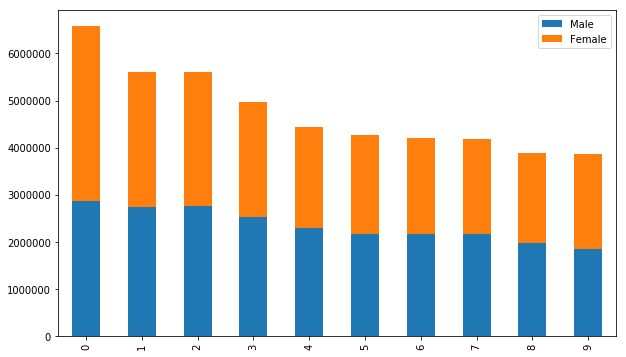

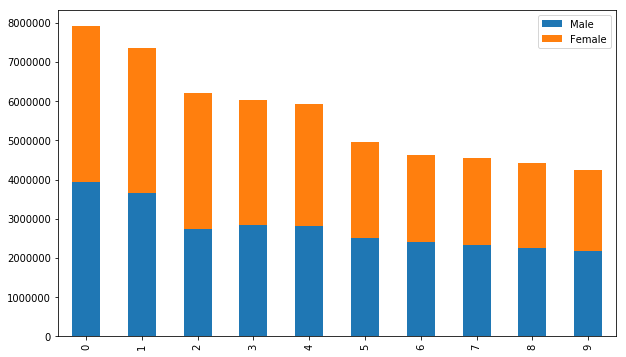

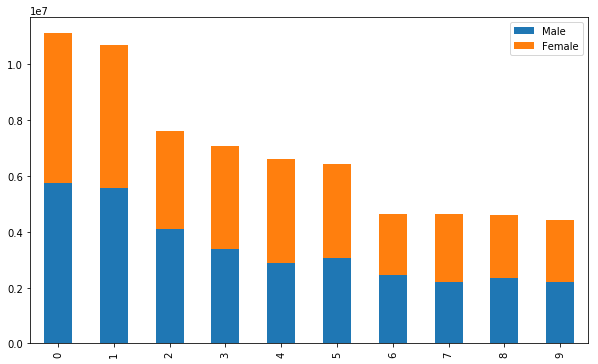

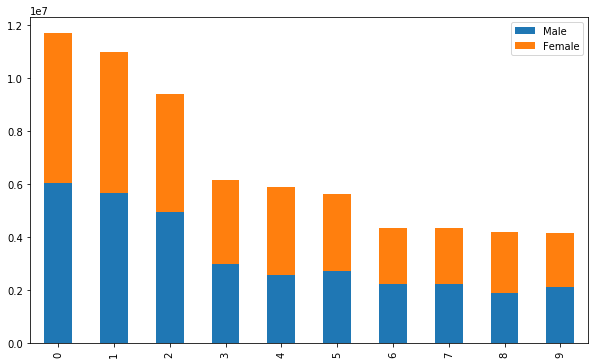

In [13]:

pq1=q1[['Address','Male','Female']]
pq2=q2[['Address','Male','Female']]
pq3=q3[['Address','Male','Female']]
pq4=q4[['Address','Male','Female']]
pq1.head(10).plot(kind='bar', figsize=(10, 6), stacked=True)
pq2.head(10).plot(kind='bar', figsize=(10, 6), stacked=True)
pq3.head(10).plot(kind='bar', figsize=(10, 6), stacked=True)
pq4.head(10).plot(kind='bar', figsize=(10, 6), stacked=True)


plt.show()

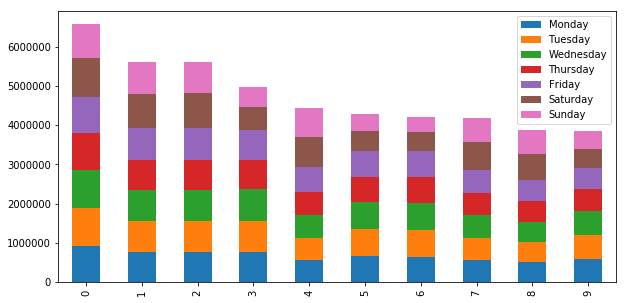

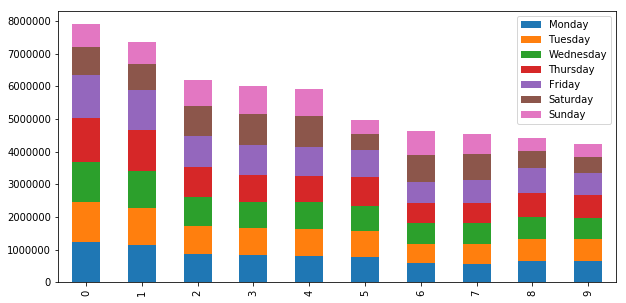

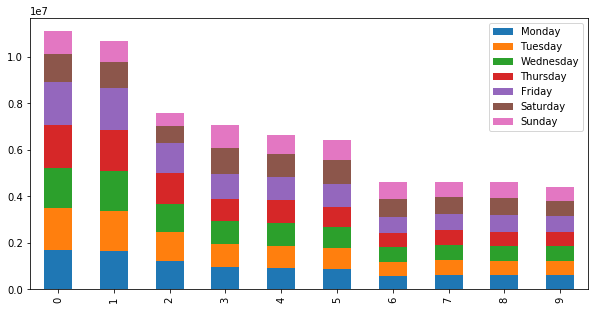

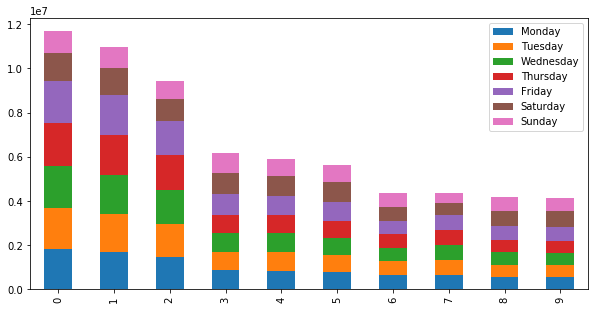

In [14]:
pd1=q1[['Address','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
pd2=q2[['Address','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
pd3=q3[['Address','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
pd4=q4[['Address','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

pd1.head(10).plot(kind='bar', figsize=(10,5), stacked=True)
pd2.head(10).plot(kind='bar', figsize=(10,5), stacked=True)
pd3.head(10).plot(kind='bar', figsize=(10,5), stacked=True)
pd4.head(10).plot(kind='bar', figsize=(10,5), stacked=True)


plt.show()

평일은 고르게 분포되어있고 유동인구가 많은 곳일 수록 평일과 주말의 차이가 크다.

분기별 유동인구가 가장 많은 곳 10군데씩 추려 중복을 제거해 이 지역을 살펴보도록 하자. 1010곳 모두 하고 싶었지만 성능의 문제로 16개만 추출.

In [15]:
address = pd.concat((q1['Address'].head(10),
                q2['Address'].head(10),
                q3['Address'].head(10),
                q4['Address'].head(10)),axis=0, ignore_index=False) 
address = address.to_frame() 

address = address.drop_duplicates()
address

,Address
0,대흥로21길
1,연서로27길
2,연서로28길
3,북아현로4길
4,신림로65길
5,신촌로37길
6,명동 명동길
7,능동로13길
8,신림동길
9,경희대로4길


In [16]:
geolocator = Nominatim(user_agent="my-application")
address['Coord'] = address['Address'].apply(geolocator.geocode)
address['Latitude'] =address['Coord'].apply(lambda x: (x.latitude))
address['Longitude'] = address['Coord'].apply(lambda x: (x.longitude))
address

,Address,Coord,Latitude,Longitude
0,대흥로21길,"(대흥로21길, 마포구, Daeheung-dong, 04107, 대한민국, (37....",37.5534,126.9453
1,연서로27길,"(연서로27길, 연신내로데오거리, 은평구, 갈현2동, 03330, 대한민국, (37...",37.6196,126.9176
2,연서로28길,"(연서로28길, 은평구, 대조동, 03331, 대한민국, (37.6175151, 1...",37.6175,126.9214
3,북아현로4길,"(북아현로4길, 서대문구, 북아현동, 03751, 대한민국, (37.5592541,...",37.5593,126.9572
4,신림로65길,"(신림로65길, 녹두거리, 관악구, 신림동, 08754, 대한민국, (37.4858...",37.4859,126.9280
5,신촌로37길,"(신촌로37길, 아현동가구거리, 서대문구, 북아현동, 03751, 대한민국, (37...",37.5584,126.9592
6,명동 명동길,"(명동길, 중구, 명동, 04538, 대한민국, (37.5638495, 126.98...",37.5638,126.9851
7,능동로13길,"(능동로13길, 모진동, 광진구, 화양동, 05030, 대한민국, (37.54368...",37.5437,127.0707
8,신림동길,"(신림동길, 관악구, 신림동, 08707, 대한민국, (37.4872894, 126...",37.4873,126.9273
9,경희대로4길,"(경희대로4길, 동대문구, 회기동, 02452, 대한민국, (37.5913243, ...",37.5913,127.0559


이 지역들이 어디에 있는지 한 눈에 보기 위해 지도위에 마커를 찍으면 아래와 같이 나온다.


In [17]:
import folium
# 서울 지도
map_seoul = folium.Map(location=[37.577313, 126.977188], zoom_start=12)

# 어디 상권인지 마커로 표시
for lat,lon, name in zip(address['Latitude'], address['Longitude'], address['Address']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seoul)  
    
map_seoul

지도 마커를 보면 첫번째 질문의 답을 구할 수 있다.
> 1. 강남구가 과연 유동인구가 가장 많은 곳일까?

유동인구가 많은 강남이지만, 상권 유동인구는 그렇지 않다. 대부분은 서대문구 근처이고, 예상치 못한 은평구에도 있는걸 확인할 수 있다. 

In [19]:

LIMIT = 100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
   lng, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=NU4LPZZQHXURFETXP0GERNGMDEI0C3DVIGWPZWNNUX2SHSFC&client_secret=N4YS5Q2CZAPABRZ5AUGB0LAFRKZPNUS4PWBBL5VCVMEQLMZ3&v=20190811&ll=37.5534162,126.9452581&radius=500&limit=100'

In [20]:
results = requests.get(url).json()

In [21]:
# 카테고리 추출
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

유동인구가 많은 상권엔 어떠한 종류의 상업시설이 있는지 알아보기 위해 Foursquare API를 이용해 알아본다.

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, latitudes, longitudes)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Address', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
seoul_venues = getNearbyVenues(names=address['Address'],
                                   latitudes=address['Latitude'],
                                   longitudes=address['Longitude']
                                  )

대흥로21길 0   37.5534
1   37.6196
2   37.6175
3   37.5593
4   37.4859
5   37.5584
6   37.5638
7   37.5437
8   37.4873
9   37.5913
5   37.5606
9   37.5054
7   37.6194
9   37.4778
6   37.5427
8   37.5547
Name: Latitude, dtype: float64 0   126.9453
1   126.9176
2   126.9214
3   126.9572
4   126.9280
5   126.9592
6   126.9851
7   127.0707
8   126.9273
9   127.0559
5   126.9641
9   126.9623
7   126.9198
9   126.9583
6   127.1374
8   126.9327
Name: Longitude, dtype: float64
연서로27길 0   37.5534
1   37.6196
2   37.6175
3   37.5593
4   37.4859
5   37.5584
6   37.5638
7   37.5437
8   37.4873
9   37.5913
5   37.5606
9   37.5054
7   37.6194
9   37.4778
6   37.5427
8   37.5547
Name: Latitude, dtype: float64 0   126.9453
1   126.9176
2   126.9214
3   126.9572
4   126.9280
5   126.9592
6   126.9851
7   127.0707
8   126.9273
9   127.0559
5   126.9641
9   126.9623
7   126.9198
9   126.9583
6   127.1374
8   126.9327
Name: Longitude, dtype: float64
연서로28길 0   37.5534
1   37.6196
2   37.6175
3   37.5593
4   3

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,ARTBOX (아트박스),Gift Shop,37.5572,126.9458
1,Ever 8 Hotel,Hotel,37.5572,126.9426
2,Mapo Art Center (마포아트센터),Performing Arts Venue,37.5501,126.9457
3,전광수 Coffee house,Coffee Shop,37.5566,126.9416
4,삼성전자서비스,Electronics Store,37.5545,126.9460


In [25]:

seoul_onehot = pd.get_dummies(seoul_venues[['Venue Category']], prefix="", prefix_sep="")

seoul_onehot['Address'] = seoul_venues['Address'] 

fixed_columns = [seoul_onehot.columns[-1]] + list(seoul_onehot.columns[:-1])
seoul_onehot = seoul_onehot[fixed_columns]

seoul_onehot.head()

,Address,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Building,Bunsik Restaurant,Burger Joint,Bus Stop,Café,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Fast Food Restaurant,French Restaurant,Fried Chicken Joint,Gift Shop,Grocery Store,Gun Range,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Market,Massage Studio,Metro Station,Mexican Restaurant,Modern European Restaurant,Multiplex,Museum,Noodle House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Café,Pizza Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Sake Bar,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soup Place,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Udon Restaurant,Used Bookstore,Vietnamese Restaurant,Wine Bar,Women's Store
0,대흥로21길,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,대흥로21길,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,대흥로21길,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,대흥로21길,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,대흥로21길,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
seoul_grouped = seoul_onehot.groupby('Address').sum().reset_index()
seoul_grouped

,Address,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Building,Bunsik Restaurant,Burger Joint,Bus Stop,Café,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Fast Food Restaurant,French Restaurant,Fried Chicken Joint,Gift Shop,Grocery Store,Gun Range,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Market,Massage Studio,Metro Station,Mexican Restaurant,Modern European Restaurant,Multiplex,Museum,Noodle House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Café,Pizza Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Sake Bar,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soup Place,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Udon Restaurant,Used Bookstore,Vietnamese Restaurant,Wine Bar,Women's Store
0,경희대로4길,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,6,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,3,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1,관악로14길,0,0,0,3,2,0,0,0,2,1,1,0,0,0,1,0,0,0,0,3,0,3,4,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,2,1,0
2,구천면로42길,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,능동로13길,0,0,0,2,2,0,0,0,0,1,0,1,1,0,0,2,1,0,0,0,0,5,2,0,0,8,0,1,0,0,1,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,0,5,0,0,0,0,1,0,1,1,0,0,0,0,0,2,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,3,0,0
4,대흥로21길,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,명동 명동길,0,0,1,2,8,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,3,3,1,3,11,0,3,0,0,5,0,0,0,0,2,0,0,0,1,2,1,0,1,1,0,14,1,0,1,0,0,1,0,2,0,0,8,0,1,0,0,0,0,0,1,2,1,0,0,1,0,0,0,1,0,0,0,2,1,1,0,0,0,3,0,1,0,0,1,0,0,1,1,2,0,0,1,0,0
6,북아현로4길,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,서달로8가길,0,0,0,2,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,2,1,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
8,신림동길,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,2,6,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,신림로65길,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,1,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
seoul_grouped.shape

(16, 101)

In [28]:
num_top_venues = 5

for hood in seoul_grouped['Address']:
    print("----"+hood+"----")
    temp = seoul_grouped[seoul_grouped['Address'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----경희대로4길----
                 venue   freq
0          Coffee Shop 6.0000
1    Korean Restaurant 4.0000
2     Sushi Restaurant 3.0000
3  Japanese Restaurant 3.0000
4               Bakery 2.0000


----관악로14길----
                 venue   freq
0          Coffee Shop 7.0000
1  Japanese Restaurant 5.0000
2   Chinese Restaurant 4.0000
3         Burger Joint 3.0000
4                 Café 3.0000


----구천면로42길----
                 venue   freq
0                 Café 2.0000
1  Japanese Restaurant 1.0000
2    Korean Restaurant 1.0000
3  American Restaurant 0.0000
4         Noodle House 0.0000


----능동로13길----
                   venue   freq
0            Coffee Shop 8.0000
1                   Café 5.0000
2      Korean Restaurant 5.0000
3    Japanese Restaurant 3.0000
4  Vietnamese Restaurant 3.0000


----대흥로21길----
                   venue   freq
0            Coffee Shop 3.0000
1          Shopping Mall 1.0000
2           Burger Joint 1.0000
3  Performing Arts Venue 1.0000
4                   Café

대부분은 카페, 음식점이 가장 인기있지만, 명동의 경우 관광객이 많아서인지 호텔이 가장 위에 있음을 알 수 있다. 

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 20

#서수
indicators = ['st', 'nd', 'rd']
columns = ['Address']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))



address_venues_sorted = pd.DataFrame(columns=columns)
address_venues_sorted['Address'] = seoul_grouped['Address']

for ind in np.arange(seoul_grouped.shape[0]):
    address_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seoul_grouped.iloc[ind, :], num_top_venues)

address_venues_sorted

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,경희대로4길,Coffee Shop,Korean Restaurant,Sushi Restaurant,Japanese Restaurant,Café,Donut Shop,Bakery,Hotel,Dumpling Restaurant,Ice Cream Shop,Italian Restaurant,Gift Shop,Dive Bar,Hostel,Dance Studio,Department Store,Gym / Fitness Center,Dessert Shop,Dim Sum Restaurant,Dog Run
1,관악로14길,Coffee Shop,Japanese Restaurant,Chinese Restaurant,Café,BBQ Joint,Burger Joint,Bakery,Korean Restaurant,Beer Bar,Spanish Restaurant,Vietnamese Restaurant,Pub,Wine Bar,Fast Food Restaurant,Italian Restaurant,Breakfast Spot,Ice Cream Shop,Donut Shop,Fried Chicken Joint,Japanese Curry Restaurant
2,구천면로42길,Café,Japanese Restaurant,Korean Restaurant,Women's Store,Electronics Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Event Space,Coffee Shop,Fast Food Restaurant,French Restaurant,Fried Chicken Joint,Gift Shop
3,능동로13길,Coffee Shop,Korean Restaurant,Café,Vietnamese Restaurant,Japanese Restaurant,Fast Food Restaurant,Sushi Restaurant,Pizza Place,Chinese Restaurant,Donut Shop,Seafood Restaurant,Bakery,BBQ Joint,Bubble Tea Shop,Buffet,Noodle House,Dessert Shop,Juice Bar,Museum,Modern European Restaurant
4,대흥로21길,Coffee Shop,Chinese Restaurant,Bubble Tea Shop,Gift Shop,Electronics Store,Performing Arts Venue,Café,Burger Joint,Shopping Mall,Hotel,Theater,Bakery,Beer Bar,Athletics & Sports,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant
5,명동 명동길,Hotel,Coffee Shop,Korean Restaurant,Bakery,Dessert Shop,Cosmetics Shop,Souvenir Shop,Café,Chinese Restaurant,Clothing Store,Optical Shop,Sandwich Place,Japanese Restaurant,Dumpling Restaurant,BBQ Joint,Theater,Fried Chicken Joint,Pet Café,Italian Restaurant,Hotel Bar
6,북아현로4길,Metro Station,Market,Chinese Restaurant,Dessert Shop,Seafood Restaurant,Donut Shop,Coffee Shop,Bakery,Italian Restaurant,Dog Run,Cosmetics Shop,Dance Studio,Hostel,Department Store,Gym / Fitness Center,Dim Sum Restaurant,Gun Range,Dive Bar,Grocery Store,Gift Shop
7,서달로8가길,Bakery,Donut Shop,Café,BBQ Joint,Bus Stop,Korean Restaurant,Chinese Restaurant,Bistro,Coffee Shop,Pizza Place,Sandwich Place,Bubble Tea Shop,Japanese Restaurant,Convenience Store,Fast Food Restaurant,Vietnamese Restaurant,Supermarket,Taco Place,Ice Cream Shop,Grocery Store
8,신림동길,Coffee Shop,Korean Restaurant,Ice Cream Shop,Bubble Tea Shop,Clothing Store,Fast Food Restaurant,Department Store,Chinese Restaurant,Shopping Mall,Multiplex,Café,Sushi Restaurant,Italian Restaurant,Bakery,BBQ Joint,Dog Run,Donut Shop,Dim Sum Restaurant,Dive Bar,Dessert Shop
9,신림로65길,Korean Restaurant,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Bubble Tea Shop,Clothing Store,Café,Multiplex,Donut Shop,Seafood Restaurant,Shopping Mall,Bowling Alley,Chinese Restaurant,Asian Restaurant,Used Bookstore,Italian Restaurant,Bakery,Event Space,Dive Bar,Dessert Shop


몇 군데를 빼면 대부분 커피샵이 가장 인기 있는 곳이다. 카페도 인기가 많다. 

카페와 커피샵을 우리나라에서는 딱히 구분하지 않지만 Foursquare에서는 구분한다. 

우리가 알고자 하는 근처 카페를 모두 찾으려면 두 카테고리 모두 사용해야한다. 상권이 좌표로 찍혔기 때문에 반경 1km내의 카페를 찾는다.

In [31]:
#1km 이내의 커피샵 찾기
def getcoffeeshop(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    venues_list2=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, latitudes, longitudes)
            
        # Fourspuare API request URL
        url2 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius=1000&limint=50,&categoryId=4bf58dd8d48988d1e0931735'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng)
        url3 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius=1000&limint=50,&categoryId=4bf58dd8d48988d16d941735'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng)
        
            
        results2 = requests.get(url2).json()["response"]['venues']
        results3 = requests.get(url3).json()["response"]['venues']
       
        # 카페의 필요한 정보만 리턴
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['location']['distance']) for v in results2])
        venues_list2.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['location']['distance']) for v in results3])
        

    coffee_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    cafe_venues =  pd.DataFrame([item for venue_list2 in venues_list2 for item in venue_list2])
    coffee_venues.columns = ['Address', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue distance']
    cafe_venues.columns= ['Address', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue distance']
    c_venues=  pd.concat([coffee_venues, cafe_venues])  
    
    return(c_venues)    

In [32]:
seoul_coffee = getcoffeeshop(names=address['Address'],
                                   latitudes=address['Latitude'],
                                   longitudes=address['Longitude'])

대흥로21길 0   37.5534
1   37.6196
2   37.6175
3   37.5593
4   37.4859
5   37.5584
6   37.5638
7   37.5437
8   37.4873
9   37.5913
5   37.5606
9   37.5054
7   37.6194
9   37.4778
6   37.5427
8   37.5547
Name: Latitude, dtype: float64 0   126.9453
1   126.9176
2   126.9214
3   126.9572
4   126.9280
5   126.9592
6   126.9851
7   127.0707
8   126.9273
9   127.0559
5   126.9641
9   126.9623
7   126.9198
9   126.9583
6   127.1374
8   126.9327
Name: Longitude, dtype: float64
연서로27길 0   37.5534
1   37.6196
2   37.6175
3   37.5593
4   37.4859
5   37.5584
6   37.5638
7   37.5437
8   37.4873
9   37.5913
5   37.5606
9   37.5054
7   37.6194
9   37.4778
6   37.5427
8   37.5547
Name: Latitude, dtype: float64 0   126.9453
1   126.9176
2   126.9214
3   126.9572
4   126.9280
5   126.9592
6   126.9851
7   127.0707
8   126.9273
9   127.0559
5   126.9641
9   126.9623
7   126.9198
9   126.9583
6   127.1374
8   126.9327
Name: Longitude, dtype: float64
연서로28길 0   37.5534
1   37.6196
2   37.6175
3   37.5593
4   3

카페 수를 세려면 프랜차이즈 카페명을 통일해야 한다. 변경을 위해 카페 목록을 조회.

In [33]:
unique_coffee=seoul_coffee.Venue.unique()
unique_coffee=sorted(unique_coffee)
unique_coffee

['#무궁화',
 '1984',
 '1st penguin cafe (퍼스트펭귄카페)',
 '4 Lines Coffee',
 '4Cups',
 '4tential',
 '823M',
 '8810 Ristretto Bar',
 '8번가',
 'A TWOSOME PLACE',
 'A TWOSOME PLACE (투썸플레이스)',
 'A Twosome Place',
 'A Twosome Place (투썸플레이스)',
 'AFTERNOON COFFEE',
 'ALOCASIA',
 'ANGLE340',
 'ANOPLA (아노플라)',
 'ARISTA COFFEE',
 'AZIT from corner be (아지트프롬코너비)',
 'Alley 14',
 'Angel in-us Coffee',
 'Angel-in-us Coffee',
 'Angel-in-us Coffee (엔제리너스)',
 'April',
 'A’BOUT COFFEE (에이바우트커피)',
 'BANANA TALK',
 'BBHAY',
 'BEANSBINS COFFEE',
 'BIROSO COFFEE',
 'BLOEM',
 'BLUEPOT 중앙대점',
 'BUNKER1 (벙커1)',
 'Baobab Kids Cafe',
 'Barista조앤',
 'Baskin-Robbins',
 'Bean Khan',
 'Beans & Berries',
 'Bench Coffee Studio (벤치커피 스튜디오)',
 'Beverage Lab',
 'Bigcup',
 'Black miel',
 'Blanc (블랑)',
 'Blanc Blanc',
 'Boomers Coffee',
 'Brioche Dorée (브리오슈도레)',
 'Brown Pill(Two) (브라운 필)',
 'Buzz Coffee',
 'C.RAZER COFFEE',
 'CAFE REDBIG',
 'CAFE YOWA (카페 요와)',
 'CAFFE PASCUCCI (파스쿠찌)',
 'CAFFÉ PASCUCCI',
 'CERA N COFFEE LAB',
 'C

정말 많은 카페들이 있다. 동네 카페인지 프랜차이즈인지 유명한걸 빼면 알 수가 없다. 지역을 한정해 찾은것이라 다른 지역에는 같은 이름의 카페가 더 있을 수도...
개수를 구하기 위해 카페명을 통일. 지점 표기도 빼도록 한다. 

In [34]:
seoul_coffee['Venue'] = seoul_coffee['Venue'].replace({'전광수 Coffee House (전광수커피하우스)':'전광수 Coffee House', 'A Twosome Place':'A TWOSOME PLACE', 'Starbucks (스타벅스)':'Starbucks',
                                              'Paul Bassett (폴바셋)':'Paul Bassett', '폴바셋':'Paul Bassett', '이디야커피':'EDIYA COFFEE','EDIYA (이디야)':'EDIYA COFFEE', '이디야커피 / EDIYA COFFEE':'EDIYA COFFEE', 'EDIYA COFFEE (이디야커피)': 'EDIYA COFFEE', 
                                              'The Coffee Bean & Tea Leaf (커피빈)':'The Coffee Bean & Tea Leaf', "빽다방 (PAIK'S COFFEE)":"PAIK'S COFFEE", '빽다방':"PAIK'S COFFEE", 'Starbucks Reserve (스타벅스 리저브)':'Starbucks Reserve)',
                                              "PAIK'S COFFEE (빽다방 (PAIK'S COFFEE))":"PAIK'S COFFEE",'HOLLYS COFFEE (할리스커피)':'HOLLYS COFFEE' ,'Hollys Coffee (할리스커피)':'HOLLYS COFFEE', 'Angel-in-us Coffee (엔제리너스)':'Angel-in-us Coffee', 'Angel in-us Coffee':'Angel-in-us Coffee',
                                              'Starbucks Reserve (스타벅스 리저브)':'Starbucks Reserve', '이디야(갈현점)':'EDIYA COFFEE', 'COFFEE SONG (커피송)':'Coffee Song', 'Starbucks Reserve (스타벅스 리저브)':'Starbucks', 'A TWOSOME PLACE (투썸플레이스)':'A TWOSOME PLACE', '스타벅스':'Starbucks', 'STARBUCKS (스타벅스 연세세브란스점)': 'Starbucks', 'Caffé bene':'까페베네', 'ediyacoffee 연신내점':'EDIYA COFFEE','이디야 충정로역점': 'EDIYA COFFEE' ,'TOM N TOMS COFFEE (탐앤탐스)': 'TOM N TOMS COFFEE', 'CAFFE PASCUCCI (파스쿠찌)':'CAFFÉ PASCUCCI', 'A Twosome Place (투썸플레이스)':'A TWOSOME PLACE', '투썸플레이스':'A TWOSOME PLACE', 'TWOSOME⁺ COFFEE' : 'TWOSOME+ COFFEE', '홍익대학교 홍문관 카페나무':'카페나무', '프롬하츠 서울역센트럴자이점':'프롬하츠', '올어바웃 (All About) (올어바웃)':'올어바웃', '오설록 티하우스 amore 성수점':'오설록 티하우스 amore','BLUEPOT 중앙대점':'BLUEPOT',  'Lilliput 릴리펏 키즈카페 마포공덕점' :'Lilliput',  "Potter's Coffee 천호점" : "Potter's Coffee",  'Sweet buns 흑석점' : 'Sweet buns',  'cafe 오가.다 이대역점' : 'cafe 오가.다', 'de chocolate coffee (경희대점)': 'de chocolate coffee',  '더착한커피(경희대점)' : '더착한커피',  '매머드커피 상도역점' : '매머드커피', '베브릿지(중앙대점)' : '베브릿지',  '오카페(AU Cafe)/흑석점' : 'AU Cafe', '커피만 중앙대점' : '커피만', 'Elephant Coffee 길동점': 'Elephant Coffee', 'Ediya Coffee (이디야커피)' : 'EDIYA COFFEE', 'FOUR B (포비)' : 'FOURB', 'FOURB (포비)' :'FOURB', 'FOURB (포비브라이트 광화문)' : 'FOURB', '이디야커피 / EDIYA COFFEE (이디야커피)' : 'EDIYA COFFEE'})

In [35]:
number_group_coffee=seoul_coffee.groupby(seoul_coffee['Venue']).size().reset_index(name='count')
number_group_coffee=number_group_coffee.sort_values(['count'], ascending=False)
number_group_coffee

,Venue,count
213,Starbucks,130
124,EDIYA COFFEE,48
9,A TWOSOME PLACE,33
141,HOLLYS COFFEE,20
230,The Coffee Bean & Tea Leaf,15
196,Paul Bassett,11
54,COFFINE GURUNARU,9
405,커피나무,7
220,TOM N TOMS COFFEE,7
46,CAFFÉ PASCUCCI,7



대부분의 카페는 프랜차이즈. 그 중 28%이상이 스타벅스. 사람 많은 곳엔 스타벅스가 있다. 


In [36]:

coffee_onehot = pd.get_dummies(seoul_coffee[['Venue']], prefix="", prefix_sep="")

coffee_onehot['Address'] = seoul_coffee['Address'] 

fixed_columns = [coffee_onehot.columns[-1]] + list(coffee_onehot.columns[:-1])
coffee_onehot = coffee_onehot[fixed_columns]

coffee_grouped = coffee_onehot.groupby('Address').sum().reset_index()
coffee_grouped

,Address,#무궁화,1984,1st penguin cafe (퍼스트펭귄카페),4 Lines Coffee,4Cups,4tential,823M,8810 Ristretto Bar,8번가,A TWOSOME PLACE,AFTERNOON COFFEE,ALOCASIA,ANGLE340,ANOPLA (아노플라),ARISTA COFFEE,AU Cafe,AZIT from corner be (아지트프롬코너비),Alley 14,Angel-in-us Coffee,April,A’BOUT COFFEE (에이바우트커피),BANANA TALK,BBHAY,BEANSBINS COFFEE,BIROSO COFFEE,BLOEM,BLUEPOT,BUNKER1 (벙커1),Baobab Kids Cafe,Barista조앤,Baskin-Robbins,Bean Khan,Beans & Berries,Bench Coffee Studio (벤치커피 스튜디오),Beverage Lab,Bigcup,Black miel,Blanc (블랑),Blanc Blanc,Boomers Coffee,Brioche Dorée (브리오슈도레),Brown Pill(Two) (브라운 필),Buzz Coffee,C.RAZER COFFEE,CAFE REDBIG,CAFE YOWA (카페 요와),CAFFÉ PASCUCCI,CERA N COFFEE LAB,CHAMP COFFEE (챔프커피),COALMINE (콜마인),COFFEE CUP,COFFEE MARKET,COFFEE THE MAN,COFFEENIE,COFFINE GURUNARU,COFFINE GURUNARU (커핀그루나루),CUP OF COFFEE,Cafe 25 Seconds,Cafe 55-1,Cafe Alice,Cafe Apr,Cafe Ato,Cafe B,Cafe Chicago,Cafe Citron Office (시트론 오피스),Cafe Civet (카페 시벳),Cafe Dicha (디샤),Cafe Eccl,Cafe Etoile,Cafe Gio,Cafe H,Cafe IMA (카페이마),Cafe Mary (카페 마리),Cafe Mignon,Cafe MoIM,Cafe Moon (카페 문),Cafe One,Cafe Sisa (카페시사),Cafe Tebah (카페 테바),Cafe Toast,Cafe Victoria Garden(빅토리아가든),Cafe W,Cafe folk,Cafe imt,Cafe 뜨락,Cafe 웅,Cafe 자리,Cafezal (카페자우),Caffe Bonito (카페보니또),Caffe Themselves (카페 뎀셀브즈),Caffè TIAMO,Café Den (카페덴),Café MAMAS (카페마마스),Café Moon Bear,Café NESCAFÉ,Center Coffee (센터커피),Cofe302,Coffe & Cross-stitch,Coffee Chewing Time,Coffee Bonobo,Coffee Burnett (커피버넷),Coffee Cooler,Coffee DNA Roasting Company (커피 디엔에이 로스팅컴퍼니),Coffee Doux,Coffee Hanyakbang (커피한약방),Coffee Lab. (커피랩),Coffee Namu,Coffee The Camp,Coffee Tree,Coffee Villa,Coffee and Cigarettes (커피앤시가렛),Coffee964,Coffeero153,Come To Rest (컴투레스트),Commtte coffee,Copper Gourmet Cafe (코퍼 카페),DESIGNERY CAFE,DREAMER 517 (드리머517),Damso Cafe,De Chocolate Coffee,Dolossi Cafe,Drip & Dutch,Dunkin',Dutch and Bean (더치앤빈),EDIYA COFFEE,EDIYA COFFEE (이디야 커피),ELEPHANT,ELYON-Coffee & Burgers,EQ Coffee,Elephant Coffee,Espressamente illy,FAN SPACE,FELT COFFEE (펠트),FOURB,Fave (페이브베이커리),Feather Coffee (페더커피),Fermata,GOODDAY COFFEE,GOON dripcoffeeshop,Gordes (고르드),Grange,HOLLYS COFFEE,HUGi,Happy Happy Bread (해피해피브레드),Heroes Roasters Coffee,Huelgo (후엘고),I NAMU,I*Sum (아이썸),Ice Bean,Il Coffee,Ilo Cafe,Innisfree Green Cafe (이니스프리 그린카페),Isaac Toast (이삭토스트),Jatz (제이츠 커피 브루어스),Jeokdang (적당),KAFFEEKLATSCH (카페클라츠),Kafe Drei,Kafe Kotton (카페 코튼),Kafe Piknic (카페피크닉),Kaleo Coffee (칼레오 커피),Kings Coffee,Kontain Coffee,LAYER57,LILT,Le Cafe Dix,Le Pul (르풀),Left Coffee,Libreak (리브릭),Lilliput,Lissone (리쏘네),Lititcoffee,LocoLAB,Lsy Lab,Lusso Lab (루소랩),Mangwon Dong Tiramisu (망원동 티라미수),Manoffin (마노핀),Mega Coffee (메가커피),Merlin (메를린),Mimi Nana,Mobydick Coffee,Mono Cheese,Moritzplatz Seoul (모리츠플라츠),My Bean,NARU (나루),NOSTRi COFFEE,Nerdy Blue House,Nicky's Take Out,Noir Ne (누아네),Not The Same (낟더쎄임),OFFROAD COFFEE,Oats Espresso (오츠에스프레소),Opera Bean Roasters (오페라빈로스터스),PAIK'S COFFEE,PARIS BAGUETTE,PARIS BAGUETTE Café,PARIS CROISSANT Café (파리크라상),Paul Bassett,Pomellowbean - Fresh Bean Library,Potter's Coffee,Punto Blu 뿐또블루,R Coffee,RABBIT PIT,RSG 성수,Rainy Day,Rose Gimbab (장미김밥),STANDING COFFEE,STRADA146,San Damiano,Schatzinsel (샤츠인젤),Seaweed Coffee,Seoulista (서울리스타),Sono,Star Lounge Cafe,Starbucks,Sweet buns,Swiss Lets Coffee,TAILOR COFFEE (테일러커피),TERAROSA COFFEE (테라로사 커피),THE HOUSE 1932 (더하우스 1932),TO GO COFFEE BOX,TOM N TOMS COFFEE,TOMAS. P (토마스피),TOP FLOOR COFFEE,TOUS les JOURS Café (뚜레쥬르),TWO DOLLARS COFFEE,TWOSOME+ COFFEE,Table1629,Tailor Coffee (테일러커피),The Bean Market,The Cafe,The Coffee Bean & Tea Leaf,The Lga coffee,The Lounge (더 라운지),There's Factory,Think-In Coffee,Unchild,W CAFE,Waffle it up (와플잇업),Wayo,We Trust Coffee,Worthy Coffee,Y.M COFFEE PROJECT,artisée (아티제),b patisserie (비파티세리 공덕),bizeun & Le Pommier (빚은 & 르뽀미에),bodacious,cafe 88.1,cafe Dream,cafe Pera (카페페라),cafe Suッkara (수카라) (수카라),cafe amam.,cafe byjun,cafe de ALPHA,cafe mágica,cafe tangent,cafe two shot,cafe 오가.다,caffe b (카페b),caffe musetti,café DROPTOP,coffee 13OZ,coffeemama 커피마마,complete coffee,dancing kal

이 분석은 2019년에 했던걸 이번에 다시 업데이트한 것인데, 그 당시엔 엔제리너스가 꽤 있었다. 그 결과로 위의 리네임하며 여러개를 바꾸었는데 이젠 하나만 남아있다. 
그 많던 카페베네가 다 사라진것과 비슷한 결과인듯. 탐 앤 탐스도 그렇고. 

In [37]:
#붉은 마커로 카페 위치 표시
for lat,lng, name in zip(seoul_coffee['Venue Latitude'], seoul_coffee['Venue Longitude'], seoul_coffee['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=3,
        popup=label,
        color='red',
        fill=False,
        parse_html=False).add_to(map_seoul)  

map_seoul

대부분의 카페는 큰 대로 근처에 있다. 같은 건물에 있어보이는 곳도 있고.

In [38]:
df_a_p=df[['Address','Total floating population']]
df_a_p=df_a_p.groupby('Address',as_index=False)['Total floating population'].sum() #4분기 전체 유동인구를 합쳤다
df_a_p=df_a_p.sort_values(['Total floating population'], ascending=False)
pop_coffee=pd.merge(df_a_p, coffee_grouped, how='inner')
pop_coffee.head()

,Address,Total floating population,#무궁화,1984,1st penguin cafe (퍼스트펭귄카페),4 Lines Coffee,4Cups,4tential,823M,8810 Ristretto Bar,8번가,A TWOSOME PLACE,AFTERNOON COFFEE,ALOCASIA,ANGLE340,ANOPLA (아노플라),ARISTA COFFEE,AU Cafe,AZIT from corner be (아지트프롬코너비),Alley 14,Angel-in-us Coffee,April,A’BOUT COFFEE (에이바우트커피),BANANA TALK,BBHAY,BEANSBINS COFFEE,BIROSO COFFEE,BLOEM,BLUEPOT,BUNKER1 (벙커1),Baobab Kids Cafe,Barista조앤,Baskin-Robbins,Bean Khan,Beans & Berries,Bench Coffee Studio (벤치커피 스튜디오),Beverage Lab,Bigcup,Black miel,Blanc (블랑),Blanc Blanc,Boomers Coffee,Brioche Dorée (브리오슈도레),Brown Pill(Two) (브라운 필),Buzz Coffee,C.RAZER COFFEE,CAFE REDBIG,CAFE YOWA (카페 요와),CAFFÉ PASCUCCI,CERA N COFFEE LAB,CHAMP COFFEE (챔프커피),COALMINE (콜마인),COFFEE CUP,COFFEE MARKET,COFFEE THE MAN,COFFEENIE,COFFINE GURUNARU,COFFINE GURUNARU (커핀그루나루),CUP OF COFFEE,Cafe 25 Seconds,Cafe 55-1,Cafe Alice,Cafe Apr,Cafe Ato,Cafe B,Cafe Chicago,Cafe Citron Office (시트론 오피스),Cafe Civet (카페 시벳),Cafe Dicha (디샤),Cafe Eccl,Cafe Etoile,Cafe Gio,Cafe H,Cafe IMA (카페이마),Cafe Mary (카페 마리),Cafe Mignon,Cafe MoIM,Cafe Moon (카페 문),Cafe One,Cafe Sisa (카페시사),Cafe Tebah (카페 테바),Cafe Toast,Cafe Victoria Garden(빅토리아가든),Cafe W,Cafe folk,Cafe imt,Cafe 뜨락,Cafe 웅,Cafe 자리,Cafezal (카페자우),Caffe Bonito (카페보니또),Caffe Themselves (카페 뎀셀브즈),Caffè TIAMO,Café Den (카페덴),Café MAMAS (카페마마스),Café Moon Bear,Café NESCAFÉ,Center Coffee (센터커피),Cofe302,Coffe & Cross-stitch,Coffee Chewing Time,Coffee Bonobo,Coffee Burnett (커피버넷),Coffee Cooler,Coffee DNA Roasting Company (커피 디엔에이 로스팅컴퍼니),Coffee Doux,Coffee Hanyakbang (커피한약방),Coffee Lab. (커피랩),Coffee Namu,Coffee The Camp,Coffee Tree,Coffee Villa,Coffee and Cigarettes (커피앤시가렛),Coffee964,Coffeero153,Come To Rest (컴투레스트),Commtte coffee,Copper Gourmet Cafe (코퍼 카페),DESIGNERY CAFE,DREAMER 517 (드리머517),Damso Cafe,De Chocolate Coffee,Dolossi Cafe,Drip & Dutch,Dunkin',Dutch and Bean (더치앤빈),EDIYA COFFEE,EDIYA COFFEE (이디야 커피),ELEPHANT,ELYON-Coffee & Burgers,EQ Coffee,Elephant Coffee,Espressamente illy,FAN SPACE,FELT COFFEE (펠트),FOURB,Fave (페이브베이커리),Feather Coffee (페더커피),Fermata,GOODDAY COFFEE,GOON dripcoffeeshop,Gordes (고르드),Grange,HOLLYS COFFEE,HUGi,Happy Happy Bread (해피해피브레드),Heroes Roasters Coffee,Huelgo (후엘고),I NAMU,I*Sum (아이썸),Ice Bean,Il Coffee,Ilo Cafe,Innisfree Green Cafe (이니스프리 그린카페),Isaac Toast (이삭토스트),Jatz (제이츠 커피 브루어스),Jeokdang (적당),KAFFEEKLATSCH (카페클라츠),Kafe Drei,Kafe Kotton (카페 코튼),Kafe Piknic (카페피크닉),Kaleo Coffee (칼레오 커피),Kings Coffee,Kontain Coffee,LAYER57,LILT,Le Cafe Dix,Le Pul (르풀),Left Coffee,Libreak (리브릭),Lilliput,Lissone (리쏘네),Lititcoffee,LocoLAB,Lsy Lab,Lusso Lab (루소랩),Mangwon Dong Tiramisu (망원동 티라미수),Manoffin (마노핀),Mega Coffee (메가커피),Merlin (메를린),Mimi Nana,Mobydick Coffee,Mono Cheese,Moritzplatz Seoul (모리츠플라츠),My Bean,NARU (나루),NOSTRi COFFEE,Nerdy Blue House,Nicky's Take Out,Noir Ne (누아네),Not The Same (낟더쎄임),OFFROAD COFFEE,Oats Espresso (오츠에스프레소),Opera Bean Roasters (오페라빈로스터스),PAIK'S COFFEE,PARIS BAGUETTE,PARIS BAGUETTE Café,PARIS CROISSANT Café (파리크라상),Paul Bassett,Pomellowbean - Fresh Bean Library,Potter's Coffee,Punto Blu 뿐또블루,R Coffee,RABBIT PIT,RSG 성수,Rainy Day,Rose Gimbab (장미김밥),STANDING COFFEE,STRADA146,San Damiano,Schatzinsel (샤츠인젤),Seaweed Coffee,Seoulista (서울리스타),Sono,Star Lounge Cafe,Starbucks,Sweet buns,Swiss Lets Coffee,TAILOR COFFEE (테일러커피),TERAROSA COFFEE (테라로사 커피),THE HOUSE 1932 (더하우스 1932),TO GO COFFEE BOX,TOM N TOMS COFFEE,TOMAS. P (토마스피),TOP FLOOR COFFEE,TOUS les JOURS Café (뚜레쥬르),TWO DOLLARS COFFEE,TWOSOME+ COFFEE,Table1629,Tailor Coffee (테일러커피),The Bean Market,The Cafe,The Coffee Bean & Tea Leaf,The Lga coffee,The Lounge (더 라운지),There's Factory,Think-In Coffee,Unchild,W CAFE,Waffle it up (와플잇업),Wayo,We Trust Coffee,Worthy Coffee,Y.M COFFEE PROJECT,artisée (아티제),b patisserie (비파티세리 공덕),bizeun & Le Pommier (빚은 & 르뽀미에),bodacious,cafe 88.1,cafe Dream,cafe Pera (카페페라),cafe Suッkara (수카라) (수카라),cafe amam.,cafe byjun,cafe de ALPHA,cafe mágica,cafe tangent,cafe two shot,cafe 오가.다,caffe b (카페b),caffe musetti,café DROPTOP,coffee 13OZ,coffeemama 커피마마,c

In [39]:
(pop_coffee>0).sum(axis=1)

0     46
1     48
2     43
3     41
4     48
5     47
6     47
7     46
8     35
9     49
10    44
11    56
12    50
13    47
14    52
15    42
dtype: int64

> 2. 가장 많은 유동인구가 있는 곳엔 카페가 얼마나 있을까?

대부분의 상권에는 40개가 넘는 카페가 있다. 반경 1km내의 지역 한정이니, 주변에 얼마나 많은 카페가 있는지를 알 수 있다.


>3. 어느 카페가 유동인구 많은 곳에 있나?

프랜차이즈가 많고, 스타벅스가 유동인구와 관계 없이 상권에 많이 있다.


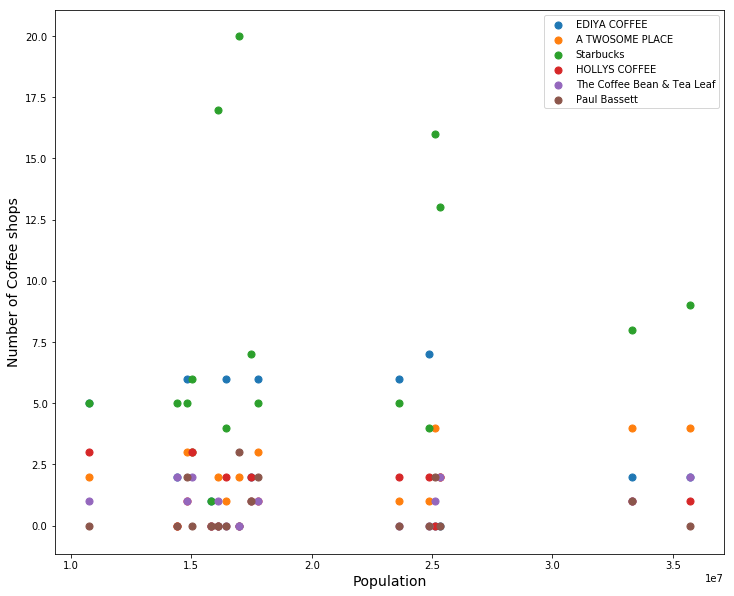

In [40]:
plt.figure(figsize=(12,10))
plt.scatter(pop_coffee['Total floating population'], pop_coffee['EDIYA COFFEE'], s=50)
plt.scatter(pop_coffee['Total floating population'], pop_coffee['A TWOSOME PLACE'], s=50)
plt.scatter(pop_coffee['Total floating population'], pop_coffee['Starbucks'], s=50)
plt.scatter(pop_coffee['Total floating population'], pop_coffee['HOLLYS COFFEE'], s=50)
plt.scatter(pop_coffee['Total floating population'], pop_coffee['The Coffee Bean & Tea Leaf'], s=50)
plt.scatter(pop_coffee['Total floating population'], pop_coffee['Paul Bassett'], s=50)
plt.xlabel('Population', fontsize=14)

plt.ylabel('Number of Coffee shops', fontsize=14)


plt.legend()
plt.show()

>4. 프랜차이즈 카페 매장의 수와 유동인구는 관계가 있을까? 많은 사람이 다니는 곳엔 어떤 프랜차이즈 카페가 많을까?

플롯을 보면 인구와 카페의 수는 크게 관련이 없어 보인다. 스타벅스가 유동인구 많은곳에 많고, 그 뒤를 투썸플레이스 잇는다.

In [41]:
top6_coffee=pop_coffee[['Address','Total floating population','Starbucks','EDIYA COFFEE','HOLLYS COFFEE','A TWOSOME PLACE','The Coffee Bean & Tea Leaf','Paul Bassett']]
top6_coffee

,Address,Total floating population,Starbucks,EDIYA COFFEE,HOLLYS COFFEE,A TWOSOME PLACE,The Coffee Bean & Tea Leaf,Paul Bassett
0,북아현로4길,35725738,9,2,1,4,2,0
1,신촌로37길,33304946,8,2,1,4,1,1
2,대흥로21길,25323501,13,0,2,2,2,0
3,충정로4길,25109975,16,0,0,4,1,2
4,연서로27길,24865661,4,7,2,1,0,0
5,연서로28길,23609076,5,6,2,1,0,0
6,신림로65길,17752701,5,6,1,3,1,2
7,능동로13길,17496562,7,2,2,1,1,1
8,명동 명동길,16969780,20,0,0,2,0,3
9,연서로29길,16429710,4,6,2,1,0,0


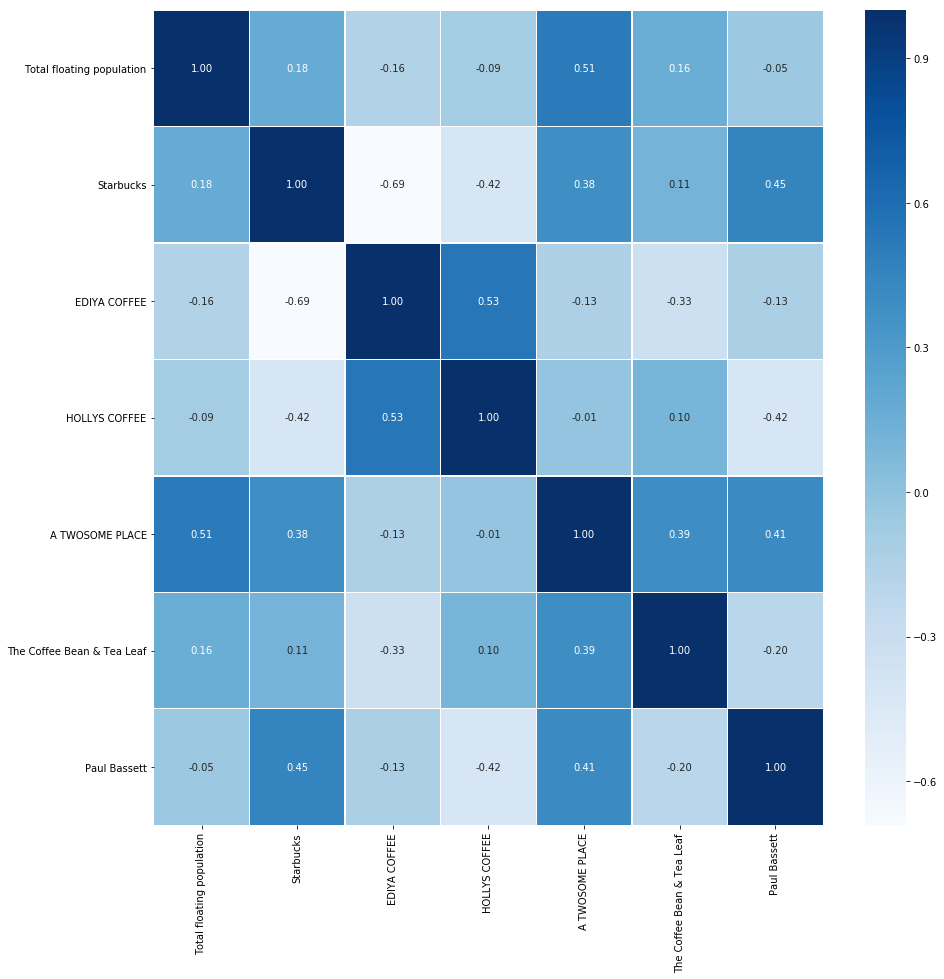

In [42]:

plt.figure(figsize=(15,15))
sns.heatmap(data = top6_coffee.corr(), annot=True, 
fmt = '.2f', linewidths=.3, cmap='Blues')

카페간의 관계를 살펴보면 이디야와 스타벅스는 정말 다르다는것을 알 수 있는데, 다른 데이터, 예를 들어 부동산 정보같은 데이터를 가지고 비교를 하면 더 좋았을 것 같다. 후에 기회가 된다면 그것에 대해 해보기.


성별, 요일별 유동인구를 넣어보았다.

In [43]:
df_s_d=df.groupby('Address',as_index=False)['Total floating population','Male','Female','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'].sum()
df_s_d=df_s_d.sort_values(['Total floating population'], ascending=False)

In [44]:
top6_df=pd.merge(df_s_d, top6_coffee, how='left')
top6_df

,Address,Total floating population,Male,Female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Starbucks,EDIYA COFFEE,HOLLYS COFFEE,A TWOSOME PLACE,The Coffee Bean & Tea Leaf,Paul Bassett
0,북아현로4길,35725738,18300976,17424784,5537204,5663881,5646895,5900446,5843429,3906931,3226974,9.0000,2.0000,1.0000,4.0000,2.0000,0.0000
1,신촌로37길,33304946,17048234,16256727,5152319,5281422,5280942,5516356,5466460,3626012,2981465,8.0000,2.0000,1.0000,4.0000,1.0000,1.0000
2,대흥로21길,25323501,11081807,14241680,3560694,3610205,3698694,3649176,3756426,3755868,3292481,13.0000,0.0000,2.0000,2.0000,2.0000,0.0000
3,충정로4길,25109975,13210619,11899362,3954583,4050518,4081588,4250211,4166716,2549144,2057232,16.0000,0.0000,0.0000,4.0000,1.0000,2.0000
4,연서로27길,24865661,11933139,12932516,3433668,3428969,3443198,3379070,3731213,3918010,3531549,4.0000,7.0000,2.0000,1.0000,0.0000,0.0000
5,연서로28길,23609076,11395609,12213461,3262115,3257670,3283365,3207384,3538211,3742657,3317673,5.0000,6.0000,2.0000,1.0000,0.0000,0.0000
6,신림로65길,17752701,9283164,8469553,2279124,2286400,2405883,2323864,2532277,3066690,2858490,5.0000,6.0000,1.0000,3.0000,1.0000,2.0000
7,능동로13길,17496562,8995120,8501443,2280458,2354781,2384174,2370110,2618834,2958646,2529578,7.0000,2.0000,2.0000,1.0000,1.0000,1.0000
8,명동 명동길,16969780,8625010,8344769,2559645,2698726,2640059,2688738,2849478,1946644,1586515,20.0000,0.0000,0.0000,2.0000,0.0000,3.0000
9,연서로29길,16429710,7896206,8533493,2259825,2267275,2280249,2243390,2462826,2570958,2345201,4.0000,6.0000,2.0000,1.0000,0.0000,0.0000


In [45]:
top6_df12=top6_df.head(12)
top6_df12

,Address,Total floating population,Male,Female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Starbucks,EDIYA COFFEE,HOLLYS COFFEE,A TWOSOME PLACE,The Coffee Bean & Tea Leaf,Paul Bassett
0,북아현로4길,35725738,18300976,17424784,5537204,5663881,5646895,5900446,5843429,3906931,3226974,9.0000,2.0000,1.0000,4.0000,2.0000,0.0000
1,신촌로37길,33304946,17048234,16256727,5152319,5281422,5280942,5516356,5466460,3626012,2981465,8.0000,2.0000,1.0000,4.0000,1.0000,1.0000
2,대흥로21길,25323501,11081807,14241680,3560694,3610205,3698694,3649176,3756426,3755868,3292481,13.0000,0.0000,2.0000,2.0000,2.0000,0.0000
3,충정로4길,25109975,13210619,11899362,3954583,4050518,4081588,4250211,4166716,2549144,2057232,16.0000,0.0000,0.0000,4.0000,1.0000,2.0000
4,연서로27길,24865661,11933139,12932516,3433668,3428969,3443198,3379070,3731213,3918010,3531549,4.0000,7.0000,2.0000,1.0000,0.0000,0.0000
5,연서로28길,23609076,11395609,12213461,3262115,3257670,3283365,3207384,3538211,3742657,3317673,5.0000,6.0000,2.0000,1.0000,0.0000,0.0000
6,신림로65길,17752701,9283164,8469553,2279124,2286400,2405883,2323864,2532277,3066690,2858490,5.0000,6.0000,1.0000,3.0000,1.0000,2.0000
7,능동로13길,17496562,8995120,8501443,2280458,2354781,2384174,2370110,2618834,2958646,2529578,7.0000,2.0000,2.0000,1.0000,1.0000,1.0000
8,명동 명동길,16969780,8625010,8344769,2559645,2698726,2640059,2688738,2849478,1946644,1586515,20.0000,0.0000,0.0000,2.0000,0.0000,3.0000
9,연서로29길,16429710,7896206,8533493,2259825,2267275,2280249,2243390,2462826,2570958,2345201,4.0000,6.0000,2.0000,1.0000,0.0000,0.0000


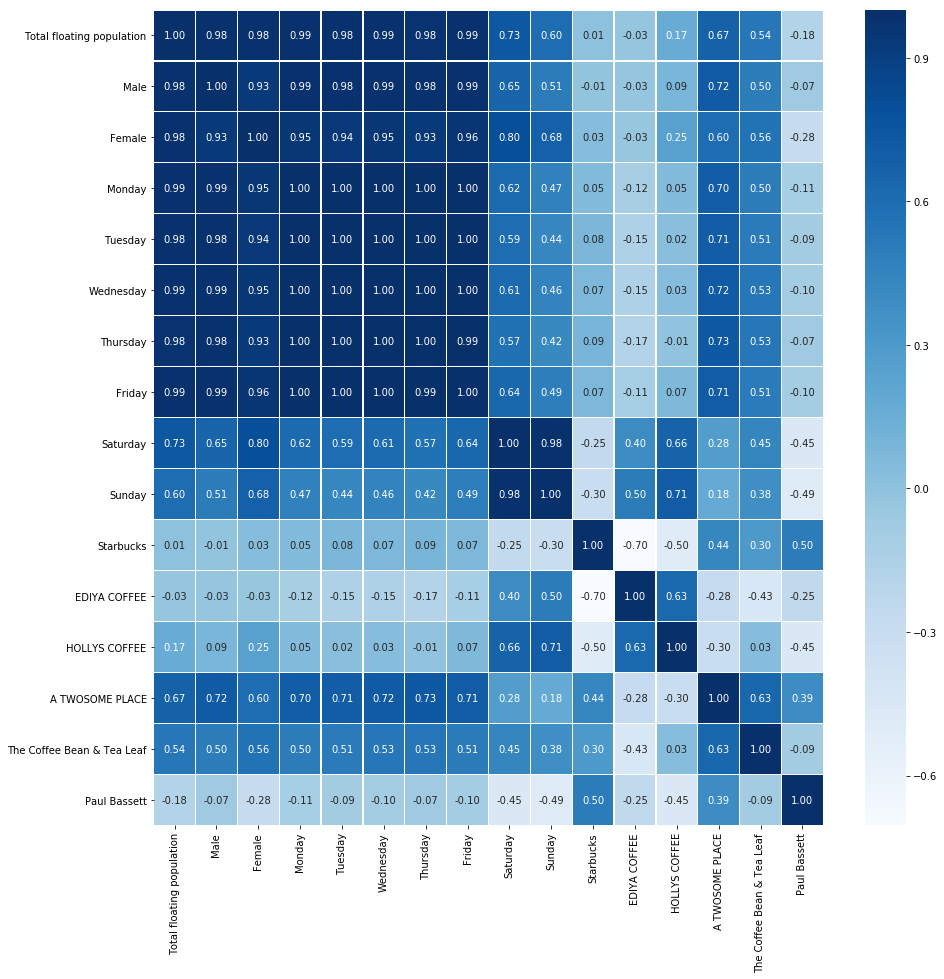

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(data = top6_df12.corr(), annot=True, fmt = '.2f', linewidths=.3, cmap='Blues')

카페의 개수를 구한 상위 12개의 데이터를 가지고 학습시켜 모든 상권에 대한 6개의 카페 개수를 구하려한다.

사실 데이터가 충분하지 않아 제대로 된 결과를 보긴 힘들지만 어느정도 비슷하게 나올지 궁금하여 진행했다.

모델은 로지스틱 회귀.


In [47]:
xx=top6_df12[['Total floating population', 'Male','Female','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]	
yy=top6_df12[['Starbucks','EDIYA COFFEE','HOLLYS COFFEE','A TWOSOME PLACE','The Coffee Bean & Tea Leaf','Paul Bassett']]
test_x=top6_df[['Total floating population','Male','Female', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [48]:
lista=list(top6_df.columns[-6:])

In [49]:
lr=LogisticRegression()
lr_df=top6_df
for a in lista:
    lr.fit(xx,yy[a])
    tt=lr.predict(test_x)
    lr_df[a]=lr_df.apply(lambda x: tt)
lr_df

,Address,Total floating population,Male,Female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Starbucks,EDIYA COFFEE,HOLLYS COFFEE,A TWOSOME PLACE,The Coffee Bean & Tea Leaf,Paul Bassett
0,북아현로4길,35725738,18300976,17424784,5537204,5663881,5646895,5900446,5843429,3906931,3226974,9.0000,2.0000,1.0000,4.0000,2.0000,0.0000
1,신촌로37길,33304946,17048234,16256727,5152319,5281422,5280942,5516356,5466460,3626012,2981465,8.0000,2.0000,1.0000,4.0000,1.0000,1.0000
2,대흥로21길,25323501,11081807,14241680,3560694,3610205,3698694,3649176,3756426,3755868,3292481,13.0000,0.0000,2.0000,2.0000,2.0000,0.0000
3,충정로4길,25109975,13210619,11899362,3954583,4050518,4081588,4250211,4166716,2549144,2057232,16.0000,0.0000,0.0000,4.0000,1.0000,2.0000
4,연서로27길,24865661,11933139,12932516,3433668,3428969,3443198,3379070,3731213,3918010,3531549,4.0000,7.0000,2.0000,1.0000,0.0000,0.0000
5,연서로28길,23609076,11395609,12213461,3262115,3257670,3283365,3207384,3538211,3742657,3317673,5.0000,6.0000,2.0000,1.0000,0.0000,0.0000
6,신림로65길,17752701,9283164,8469553,2279124,2286400,2405883,2323864,2532277,3066690,2858490,5.0000,6.0000,1.0000,3.0000,1.0000,2.0000
7,능동로13길,17496562,8995120,8501443,2280458,2354781,2384174,2370110,2618834,2958646,2529578,7.0000,2.0000,2.0000,1.0000,1.0000,1.0000
8,명동 명동길,16969780,8625010,8344769,2559645,2698726,2640059,2688738,2849478,1946644,1586515,20.0000,0.0000,0.0000,2.0000,0.0000,3.0000
9,연서로29길,16429710,7896206,8533493,2259825,2267275,2280249,2243390,2462826,2570958,2345201,4.0000,6.0000,2.0000,1.0000,0.0000,0.0000


예측 값 확인을 위해 유동인구 하위 5군데의 카페를 찾아봤다.

In [50]:
t_address = df_a_p.tail(5)
t_address['Coord'] = t_address['Address'].apply(geolocator.geocode)
t_address['Latitude'] =t_address['Coord'].apply(lambda x: (x.latitude))
t_address['Longitude'] = t_address['Coord'].apply(lambda x: (x.longitude))

t_seoul_coffee = getcoffeeshop(names=t_address['Address'],
                                   latitudes=t_address['Latitude'],
                                   longitudes=t_address['Longitude']
                                  )
t_seoul_coffee['Venue'] = t_seoul_coffee['Venue'].replace({'Starbucks (스타벅스)':'Starbucks', 'EDIYA COFFEE (소하 신촌점)' : 'EDIYA COFFEE', 'EDIYA COFFEE (이디야커피)' :'EDIYA COFFEE', 'Ediya Coffee 도봉산역점' : 'EDIYA COFFEE', 'Ediya Coffee 도봉중앙점' : 'EDIYA COFFEE', 'The Coffee Bean & Tea Leaf (커피빈)' : 'The Coffee Bean & Tea Leaf', 'Twosome Place 광명소하점' : 'A TWOSOME PLACE', 'Twosome Place 광명신촌사거리점':'A TWOSOME PLACE', '스타벅스': 'Starbucks', '이디야커피' : 'EDIYA COFFEE', '이디야 고덕래미안힐스점':'EDIYA COFFEE', '투썸플레이스' : 'A TWOSOME PLACE'})

t_coffee_onehot = pd.get_dummies(t_seoul_coffee[['Venue']], prefix="", prefix_sep="")

t_coffee_onehot['Address'] = t_seoul_coffee['Address'] 

t_fixed_columns = [t_coffee_onehot.columns[-1]] + list(t_coffee_onehot.columns[:-1])
t_coffee_onehot = t_coffee_onehot[t_fixed_columns]

t_coffee_grouped = t_coffee_onehot.groupby('Address').sum().reset_index()

t_pop_coffee=pd.merge(t_address, t_coffee_grouped, how='inner')


도봉산4길 259   37.6888
127   37.4534
942   37.6117
432   37.5972
302   37.5607
Name: Latitude, dtype: float64 259   127.0423
127   126.8915
942   126.9651
432   126.9674
302   127.1613
Name: Longitude, dtype: float64
금하로1길 259   37.6888
127   37.4534
942   37.6117
432   37.5972
302   37.5607
Name: Latitude, dtype: float64 259   127.0423
127   126.8915
942   126.9651
432   126.9674
302   127.1613
Name: Longitude, dtype: float64
평창길 259   37.6888
127   37.4534
942   37.6117
432   37.5972
302   37.5607
Name: Latitude, dtype: float64 259   127.0423
127   126.8915
942   126.9651
432   126.9674
302   127.1613
Name: Longitude, dtype: float64
백석동길 259   37.6888
127   37.4534
942   37.6117
432   37.5972
302   37.5607
Name: Latitude, dtype: float64 259   127.0423
127   126.8915
942   126.9651
432   126.9674
302   127.1613
Name: Longitude, dtype: float64
동남로82길 259   37.6888
127   37.4534
942   37.6117
432   37.5972
302   37.5607
Name: Latitude, dtype: float64 259   127.0423
127   126.8915
942   126

In [51]:
bot5_coffee=t_pop_coffee[['Address','Total floating population','Starbucks','EDIYA COFFEE','HOLLYS COFFEE','A TWOSOME PLACE','The Coffee Bean & Tea Leaf','Paul Bassett']]
bot5_coffee

KeyError: "['Paul Bassett'] not in index"



유동인구 하위 5군데에는 폴 바셋이 없다.



In [52]:
bot5_coffee=t_pop_coffee[['Address','Total floating population','Starbucks','EDIYA COFFEE','HOLLYS COFFEE','A TWOSOME PLACE','The Coffee Bean & Tea Leaf']]
bot5_coffee

,Address,Total floating population,Starbucks,EDIYA COFFEE,HOLLYS COFFEE,A TWOSOME PLACE,The Coffee Bean & Tea Leaf
0,도봉산4길,386351,0,3,0,0,0
1,금하로1길,379603,3,9,1,5,1
2,평창길,265292,1,0,0,0,0
3,백석동길,260718,1,1,0,0,0
4,동남로82길,214289,1,2,1,0,1


In [53]:
lr_df.tail(5)

,Address,Total floating population,Male,Female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Starbucks,EDIYA COFFEE,HOLLYS COFFEE,A TWOSOME PLACE,The Coffee Bean & Tea Leaf,Paul Bassett
1005,도봉산4길,386351,206833,179521,38066,45232,44913,40595,41598,79252,96678,4.0000,6.0000,1.0000,3.0000,0.0000,0.0000
1006,금하로1길,379603,203113,176496,50652,49660,50639,49131,52283,58921,68319,4.0000,6.0000,1.0000,3.0000,2.0000,0.0000
1007,평창길,265292,103071,162228,45062,44882,42783,33073,32993,25932,40557,4.0000,6.0000,0.0000,0.0000,2.0000,0.0000
1008,백석동길,260718,119304,141415,29442,33651,35078,31744,35377,49211,46221,17.0000,6.0000,0.0000,0.0000,1.0000,0.0000
1009,동남로82길,214289,172636,41664,33245,33905,34509,34691,35300,28391,14258,16.0000,1.0000,2.0000,4.0000,1.0000,2.0000


> 5. 유동인구로 근처에 어떤 카페가 얼마나 있을지 알 수 있을까?

이것에 대한 답은, 표본이 적은 내 데이터로는 불가능. 

## 결론
서울 상권엔 유동인구가 정말 많다. 그 중 서대문구 등에 사람이 몰리며, 사람이 많은 만큼 카페도 많고, 그 많은 카페 중 스타벅스 등의 유명 프랜차이즈가 대부분을 차지한다. 

데이터가 부족해 비록 예측 모델은 꽝이지만, 후에 더 많은 데이터를 추가해 여러 방법을 통해 다시 해보고 싶어졌다.
